# House_price_prediction

1. Provide insights on Housing Data
2. Understand importance of Preprocessing
3. Introduction to feature engineering

In [128]:
# Igonore Warnings
import warnings

# Standard
import numpy as np
import pandas as pd
import datetime
import random
from time import time

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor

# Stats
from scipy.stats import skew, norm

# Misc
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

import math
from sklearn.metrics import mean_squared_error, make_scorer


In [2]:
# Ignore all warnings
warnings.filterwarnings('ignore')

### Import data

In [224]:
# Read in the dataset as a dataframe
train = pd.read_csv('data/train.csv')
pd.set_option('display.max_columns', train.shape[1])
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [249]:
# Shape of train and test data:
# Dataset shape
print(f"Train data (number of rows): {train.shape[0]}, (number of column): {train.shape[1]}")

Train data (number of rows): 1460, (number of column): 81


Even in the first rows of our data, we can see that there are attributes with NaN values (missing data). I will investigate this later.

### Understand the data

Now I will merge two datasets to have an overview of the housing price data as a whole. This will later help in conducting preliminary processing more easily, as there will be only one reference to the data.

In [6]:
# X = pd.concat([train.drop("SalePrice", axis=1),test], axis=0).copy()
# y = train[['SalePrice']]
# X.info()

In [225]:
X = train.drop("SalePrice", axis=1).copy()
Y = train[['SalePrice']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
X.shape

(1460, 80)

To gain deeper insights into the data, I will divide it into numerical and categorical, as I will use different visualization techniques for these two types of data.

In [7]:
numeric_X = X.select_dtypes(exclude=['object']).drop(['Id','MSSubClass'], axis=1).copy()
numeric_X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [8]:
object_X = X.select_dtypes(include=['object']).copy()
object_X['MSSubClass'] = X['MSSubClass']   #MSSubClass is nominal
object_X.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')

### Univariate analysis

#### Numerical data

When analyzing numerical data, we usually use charts that show the distribution of statistical features such as mean, median, and mode. Histograms or distribution plots are commonly used for this purpose.

Another type of chart used in such cases is the boxplot. They are most commonly used for identifying outliers, which might be needed later during the preliminary data processing stage.

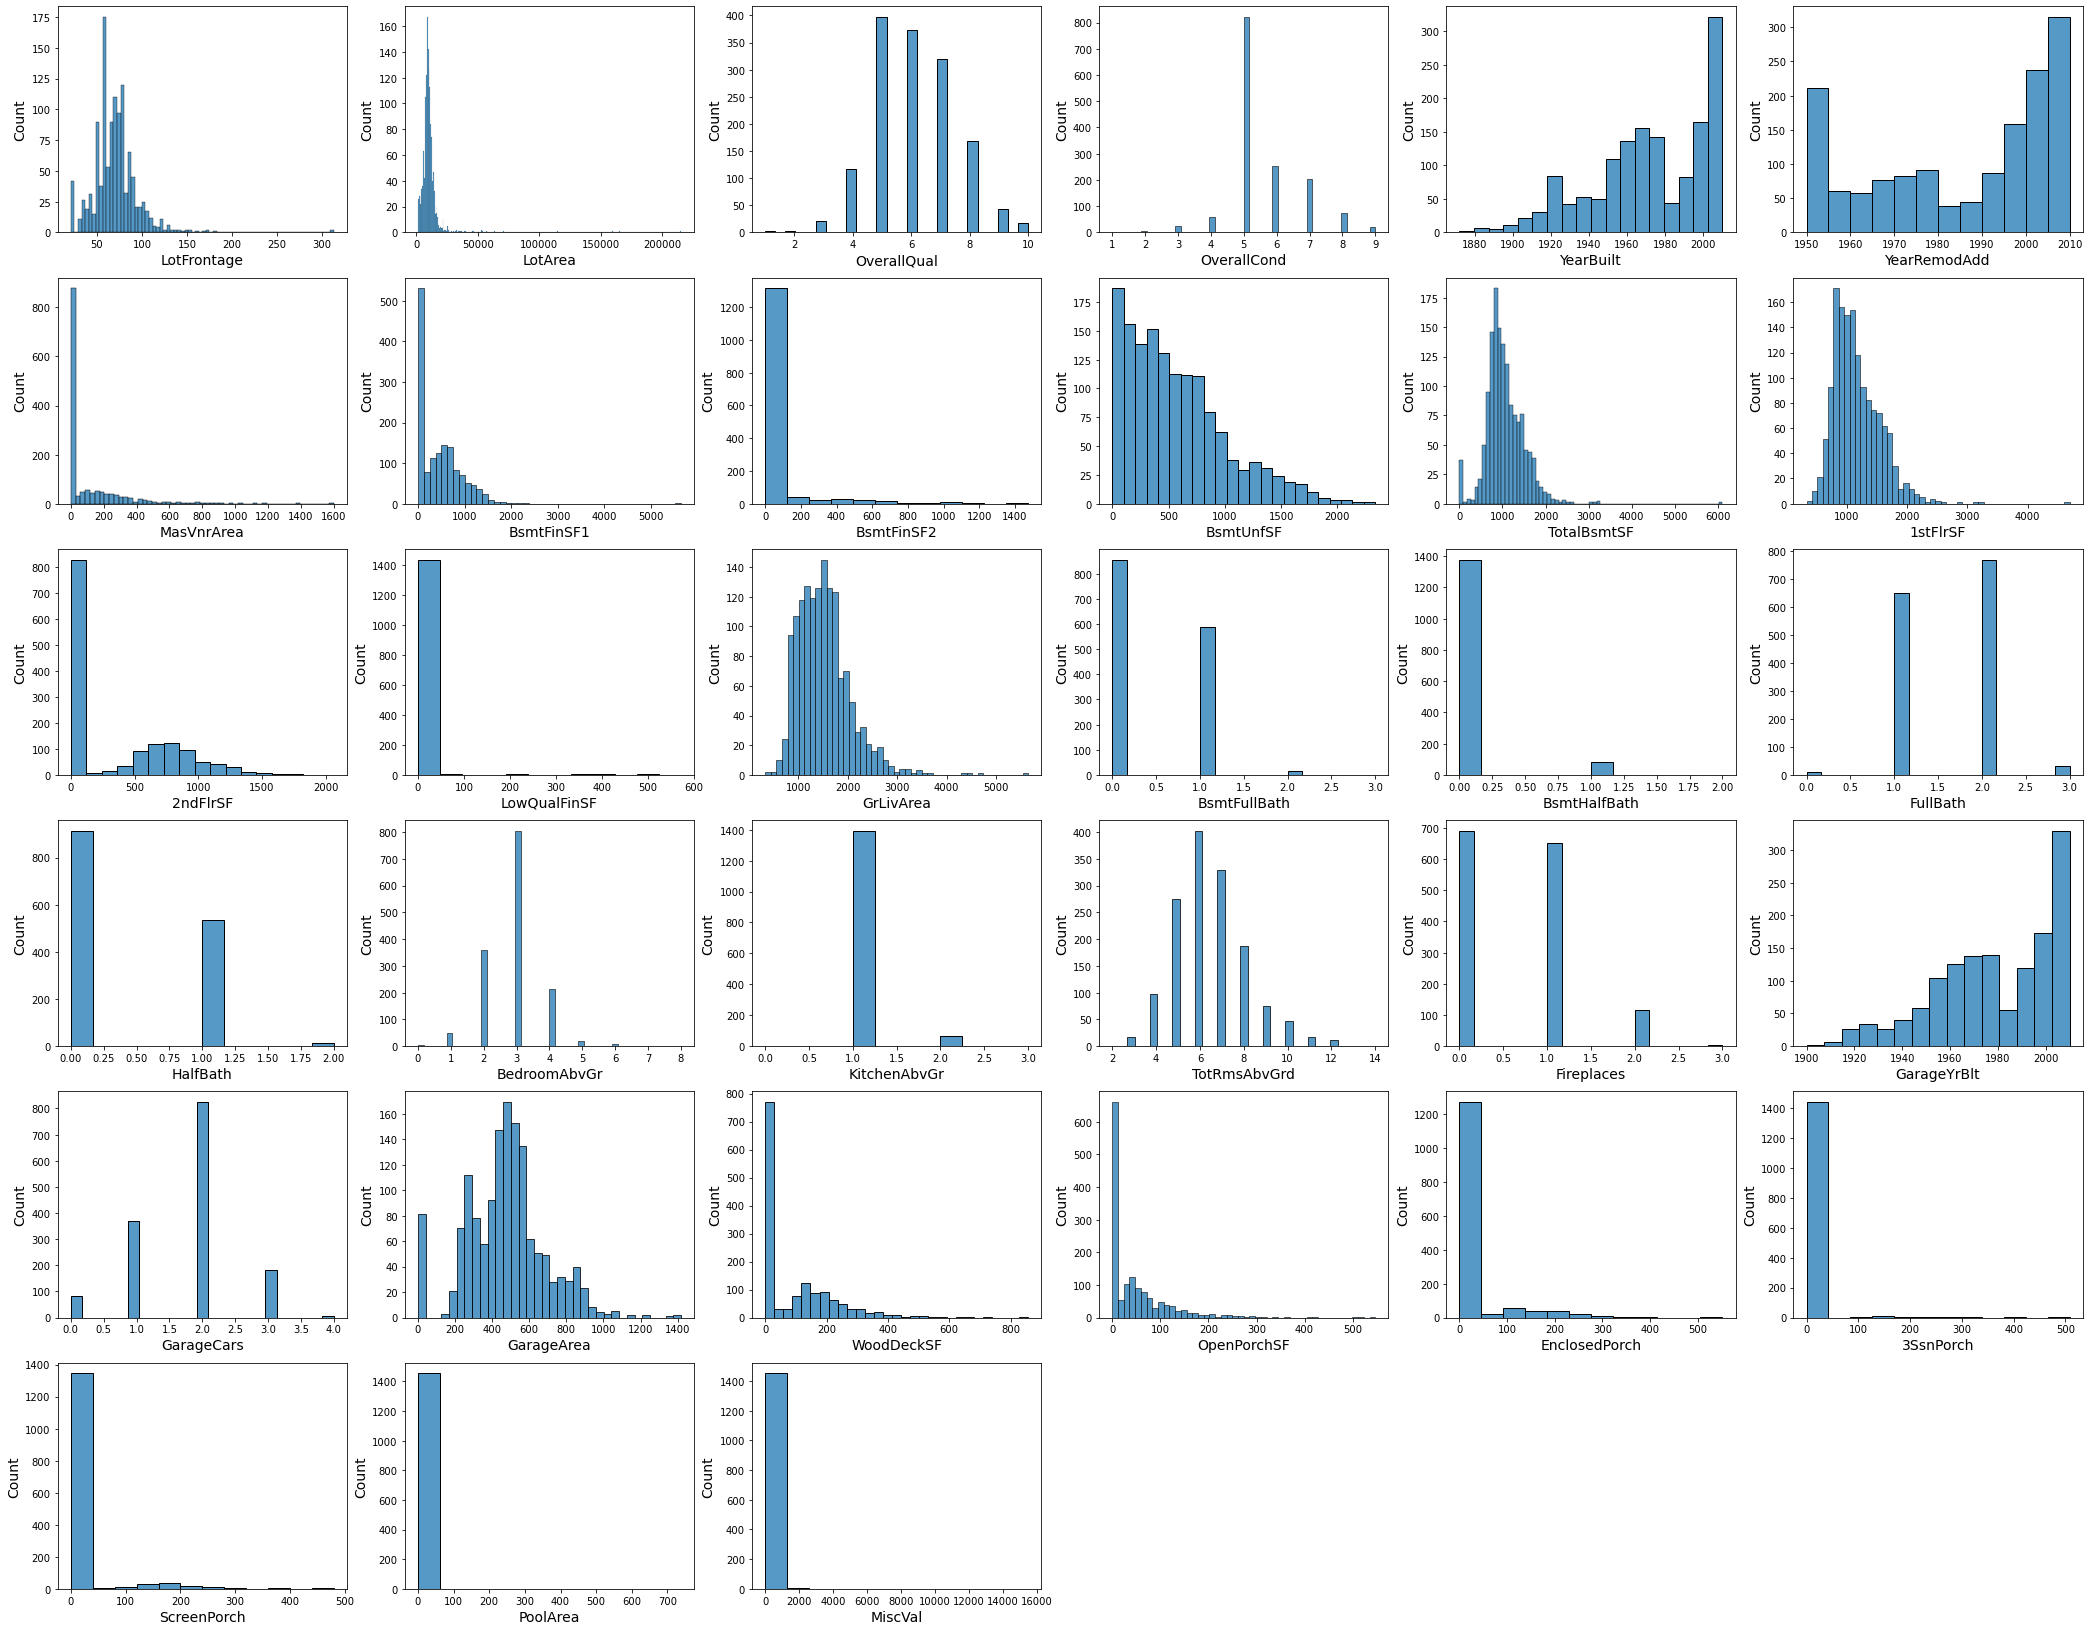

In [9]:
# visualising some more outliers in the data values
fig = plt.figure(figsize=(15,70))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
for i, feature in enumerate(list(numeric_X.columns), 1):
    if(feature=='MoSold'):
        break
    plt.subplot(len(list(numeric_X)), 6, i)
    sns.histplot(numeric_X.loc[:,feature].dropna(), kde=False)
        
    plt.xlabel('{}'.format(feature), size=14)
    plt.ylabel('Count', size=14)

plt.show()

We can see that some attributes, although numerical, behave as if they were categorical. I will now extract these columns.

In [10]:
## extracted numerical columns that behave like categorical
obj_num_X = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

In [11]:
## numerical attributes excluding those that behave like categorical
num_without_obj_X = []
for i in numeric_X.columns:
    if i not in obj_num_X:
        num_without_obj_X.append(i)

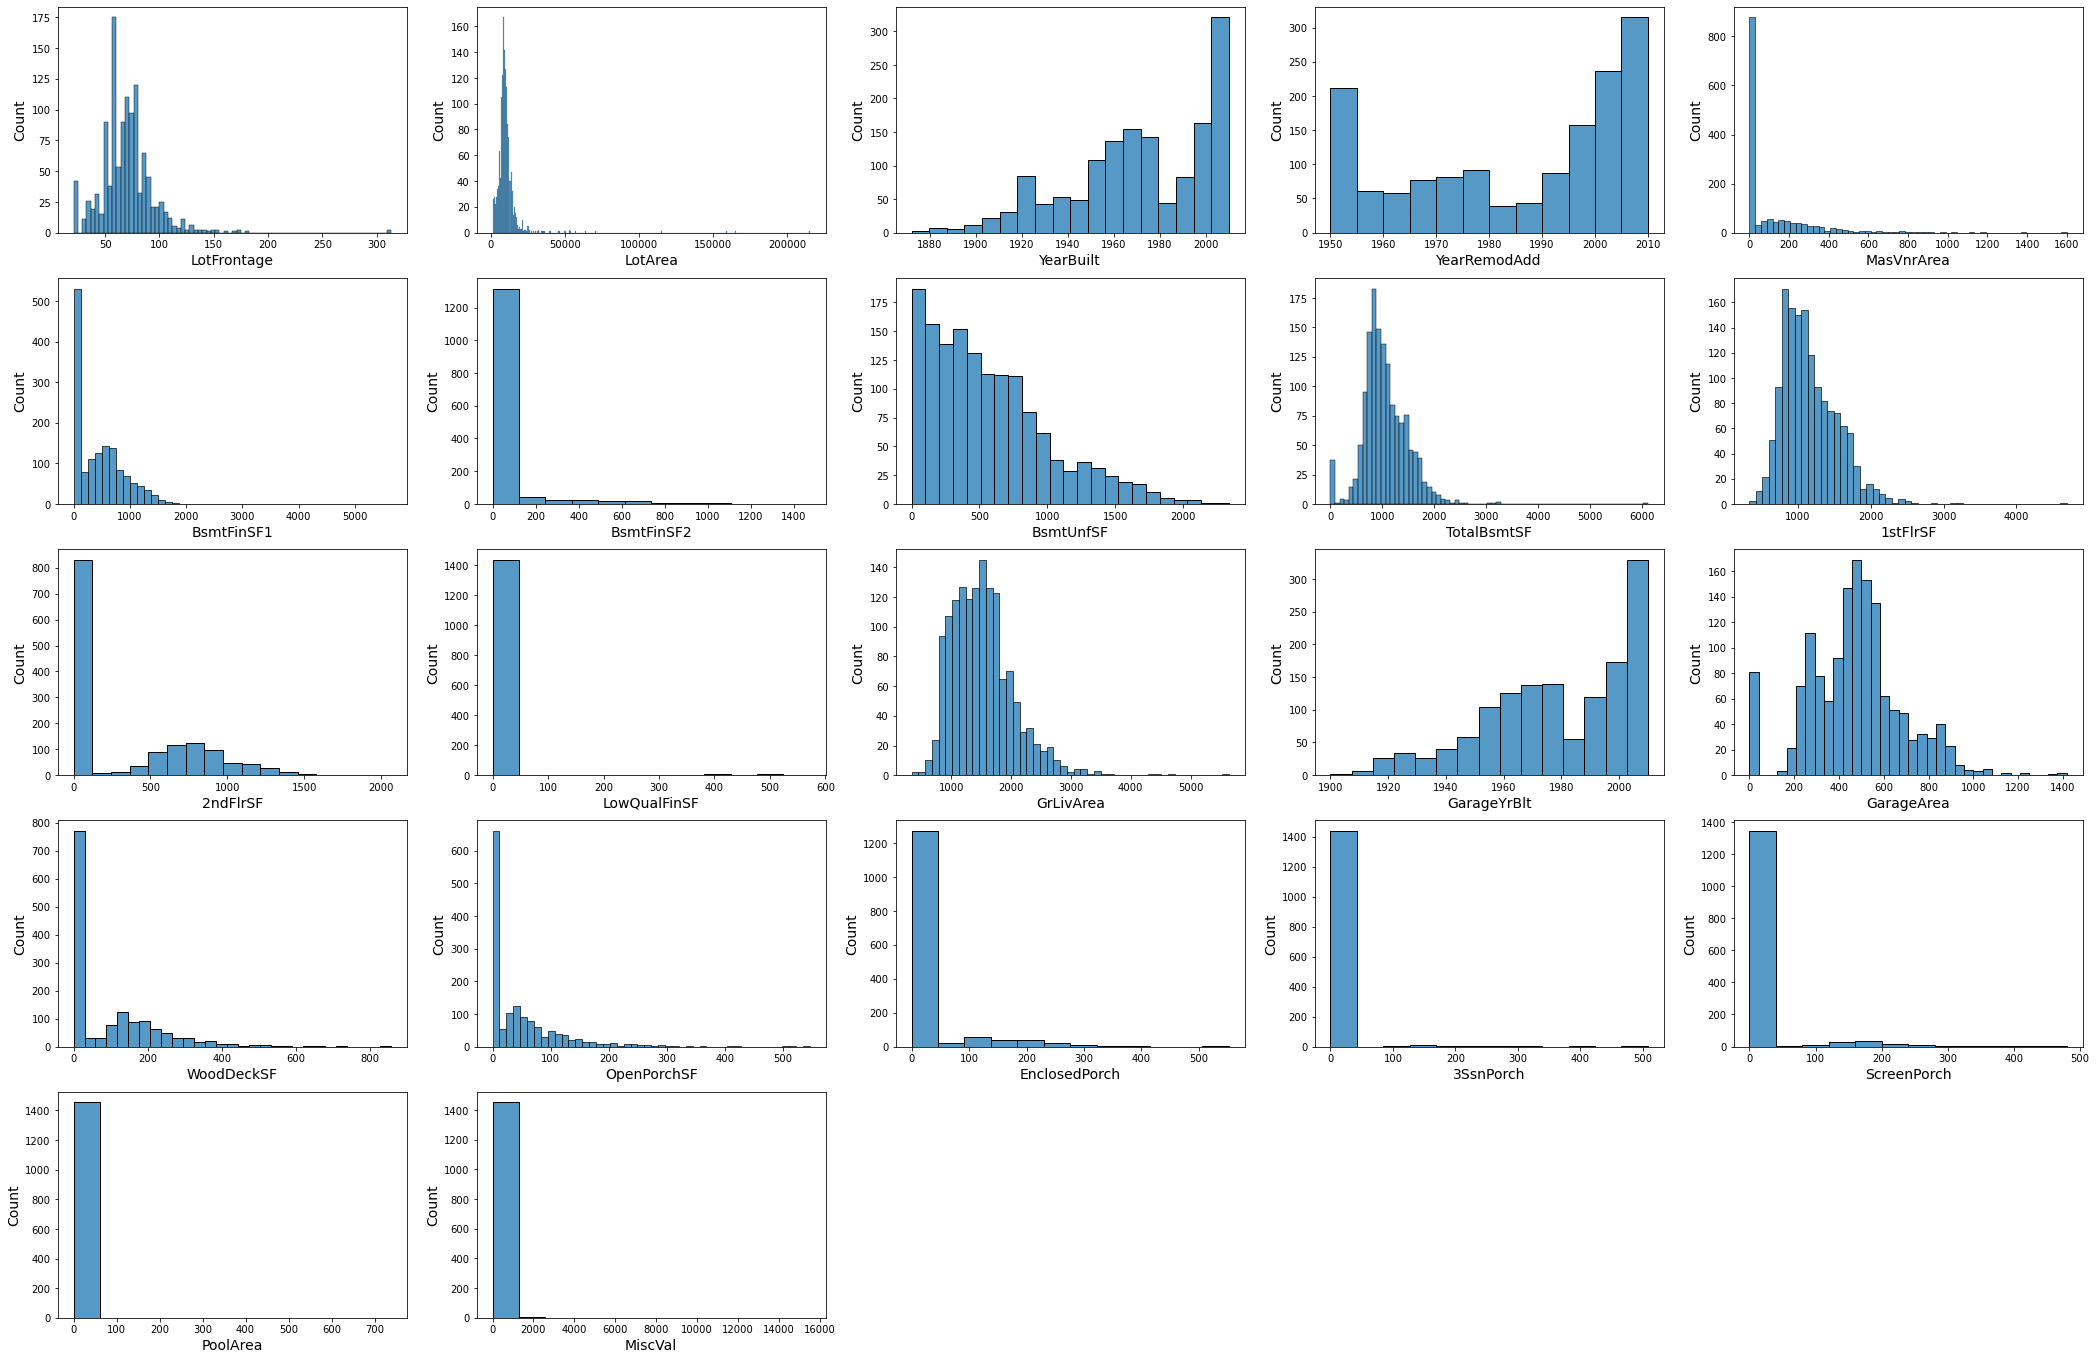

In [12]:
fig = plt.figure(figsize=(15,70))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
for i, feature in enumerate(list(num_without_obj_X), 1):
    if(feature=='MoSold'):
        break
    plt.subplot(len(list(numeric_X)), 5, i)
    sns.histplot(numeric_X.loc[:,feature].dropna(), kde=False)
        
    plt.xlabel('{}'.format(feature), size=14)
    plt.ylabel('Count', size=14)

plt.show()

The plots above also show that there are several attributes that mostly have only one value.

1. BsmtFinSF2 
2. LowQualFinSF 
3. EnclosedPorch 
4. 3SsnPorch
5. ScreenPorch
6. PoolArea
7. MiscVal

All these features are highly skewed. A lot of zeros in the distribution do not actually add information for predicting housing prices. Therefore, I will remove them during our preliminary processing stage.

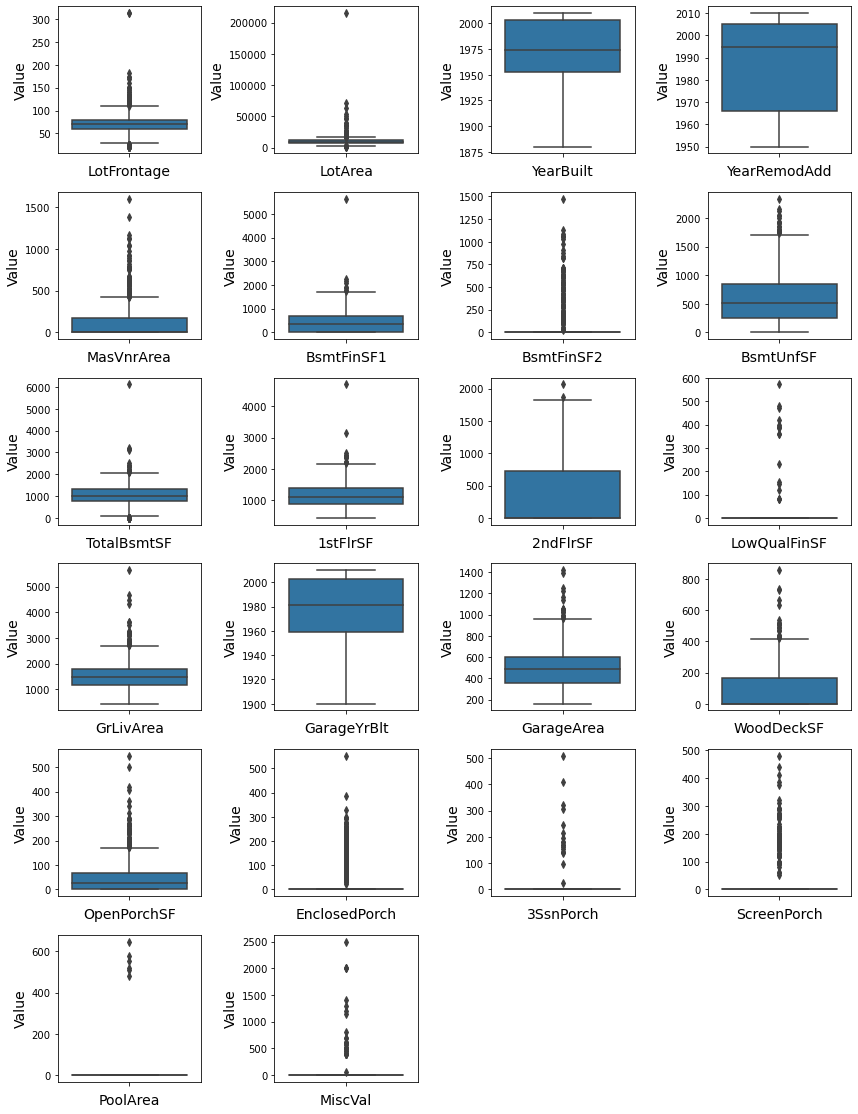

In [13]:
fig = plt.figure(figsize=(12,90))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
for i, feature in enumerate(list(num_without_obj_X), 1):
    if(feature=='MoSold'):
        break
    plt.subplot(len(list(numeric_X)), 4, i)
    sns.boxplot(y=feature, data=numeric_X.dropna())
        
    plt.xlabel('{}'.format(feature), size=14)
    plt.ylabel('Value', size=14)

fig.tight_layout(pad=1)        
plt.show()

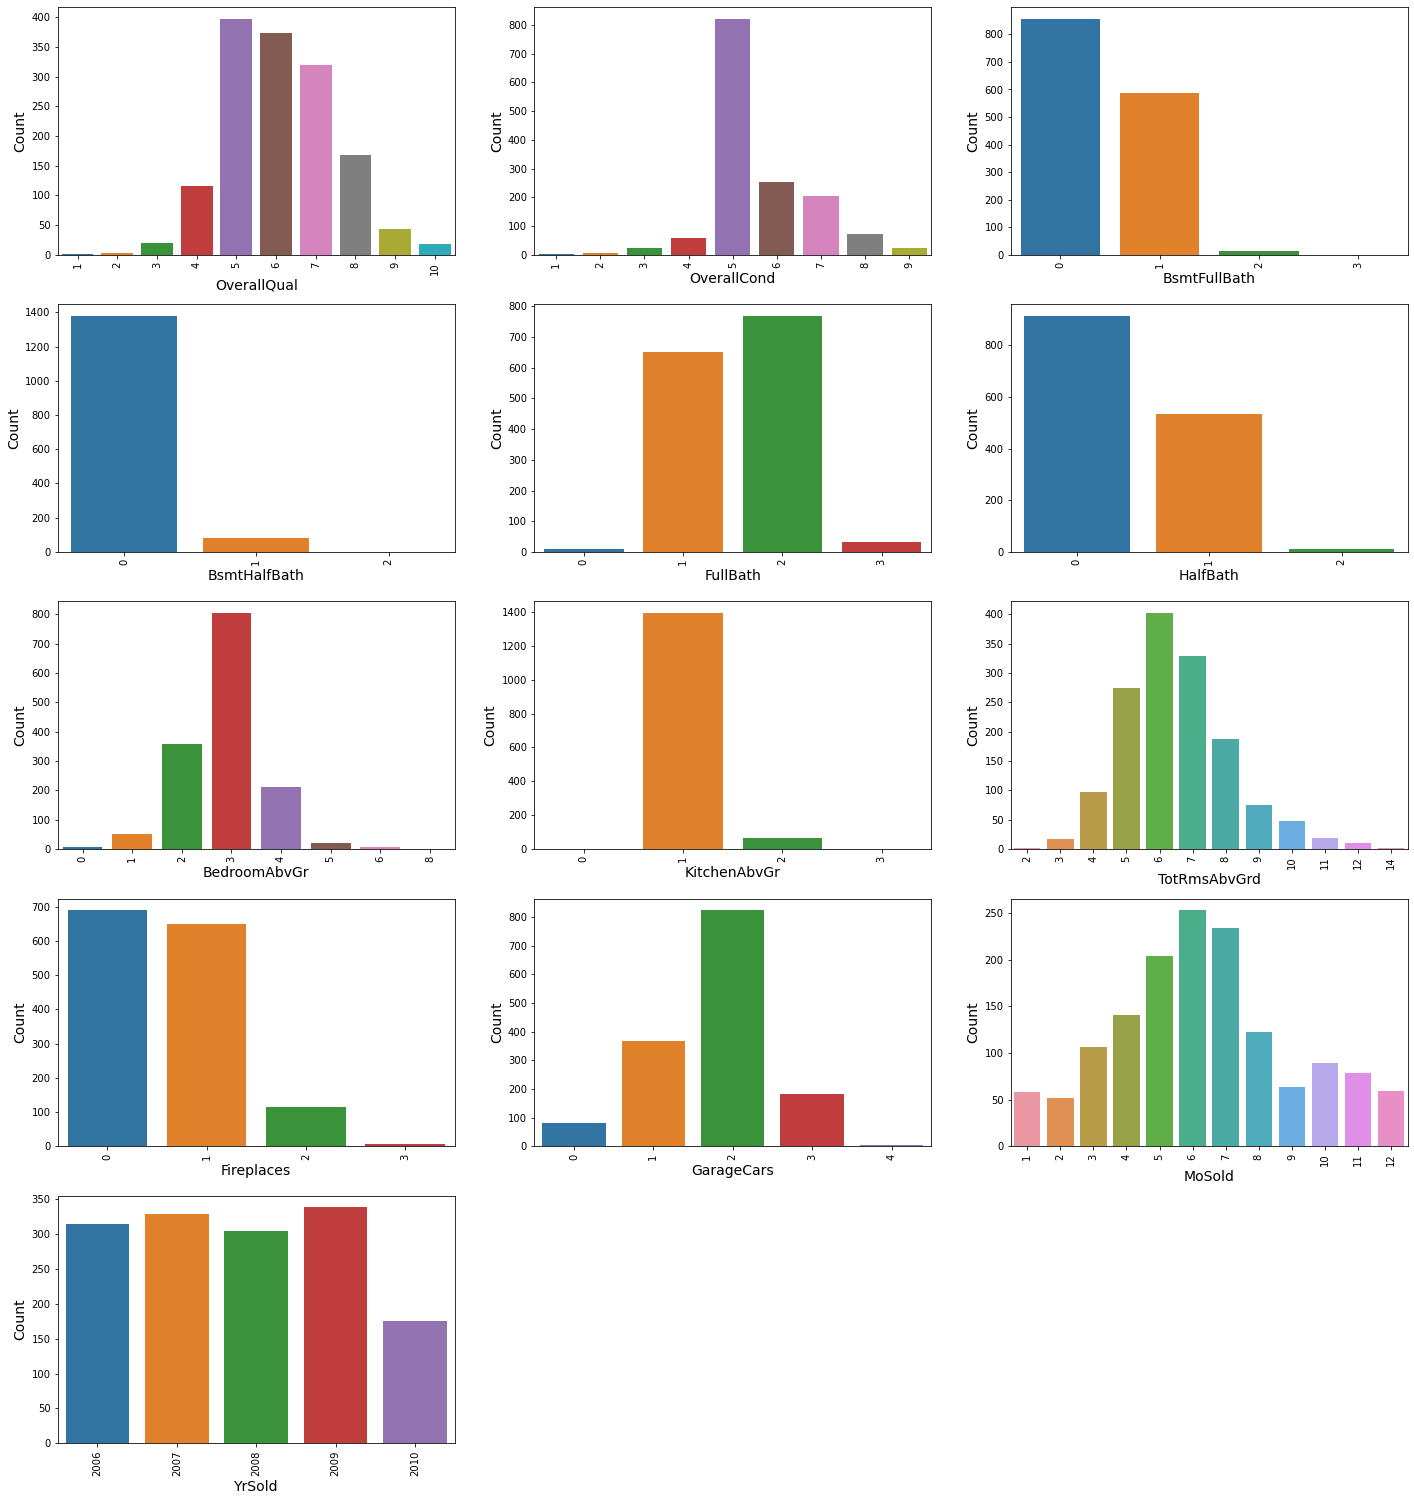

In [14]:
fig = plt.figure(figsize=(10,50))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=3)
for i, feature in enumerate(list(obj_num_X), 1):
    plt.subplot(len(list(numeric_X)), 3, i)
    sns.countplot(x=numeric_X.loc[:,feature].dropna(), data=numeric_X.dropna())
    
    plt.xticks(rotation=90)    
    plt.xlabel('{}'.format(feature), size=14)
    plt.ylabel('Count', size=14)
       
plt.show()

#### Categorical data

For categorical data, we usually use charts that show the count of each value (countplot). They allow us to quickly check if a particular value predominates in a given attribute, whether there are various values, or if only one value is prevalent.

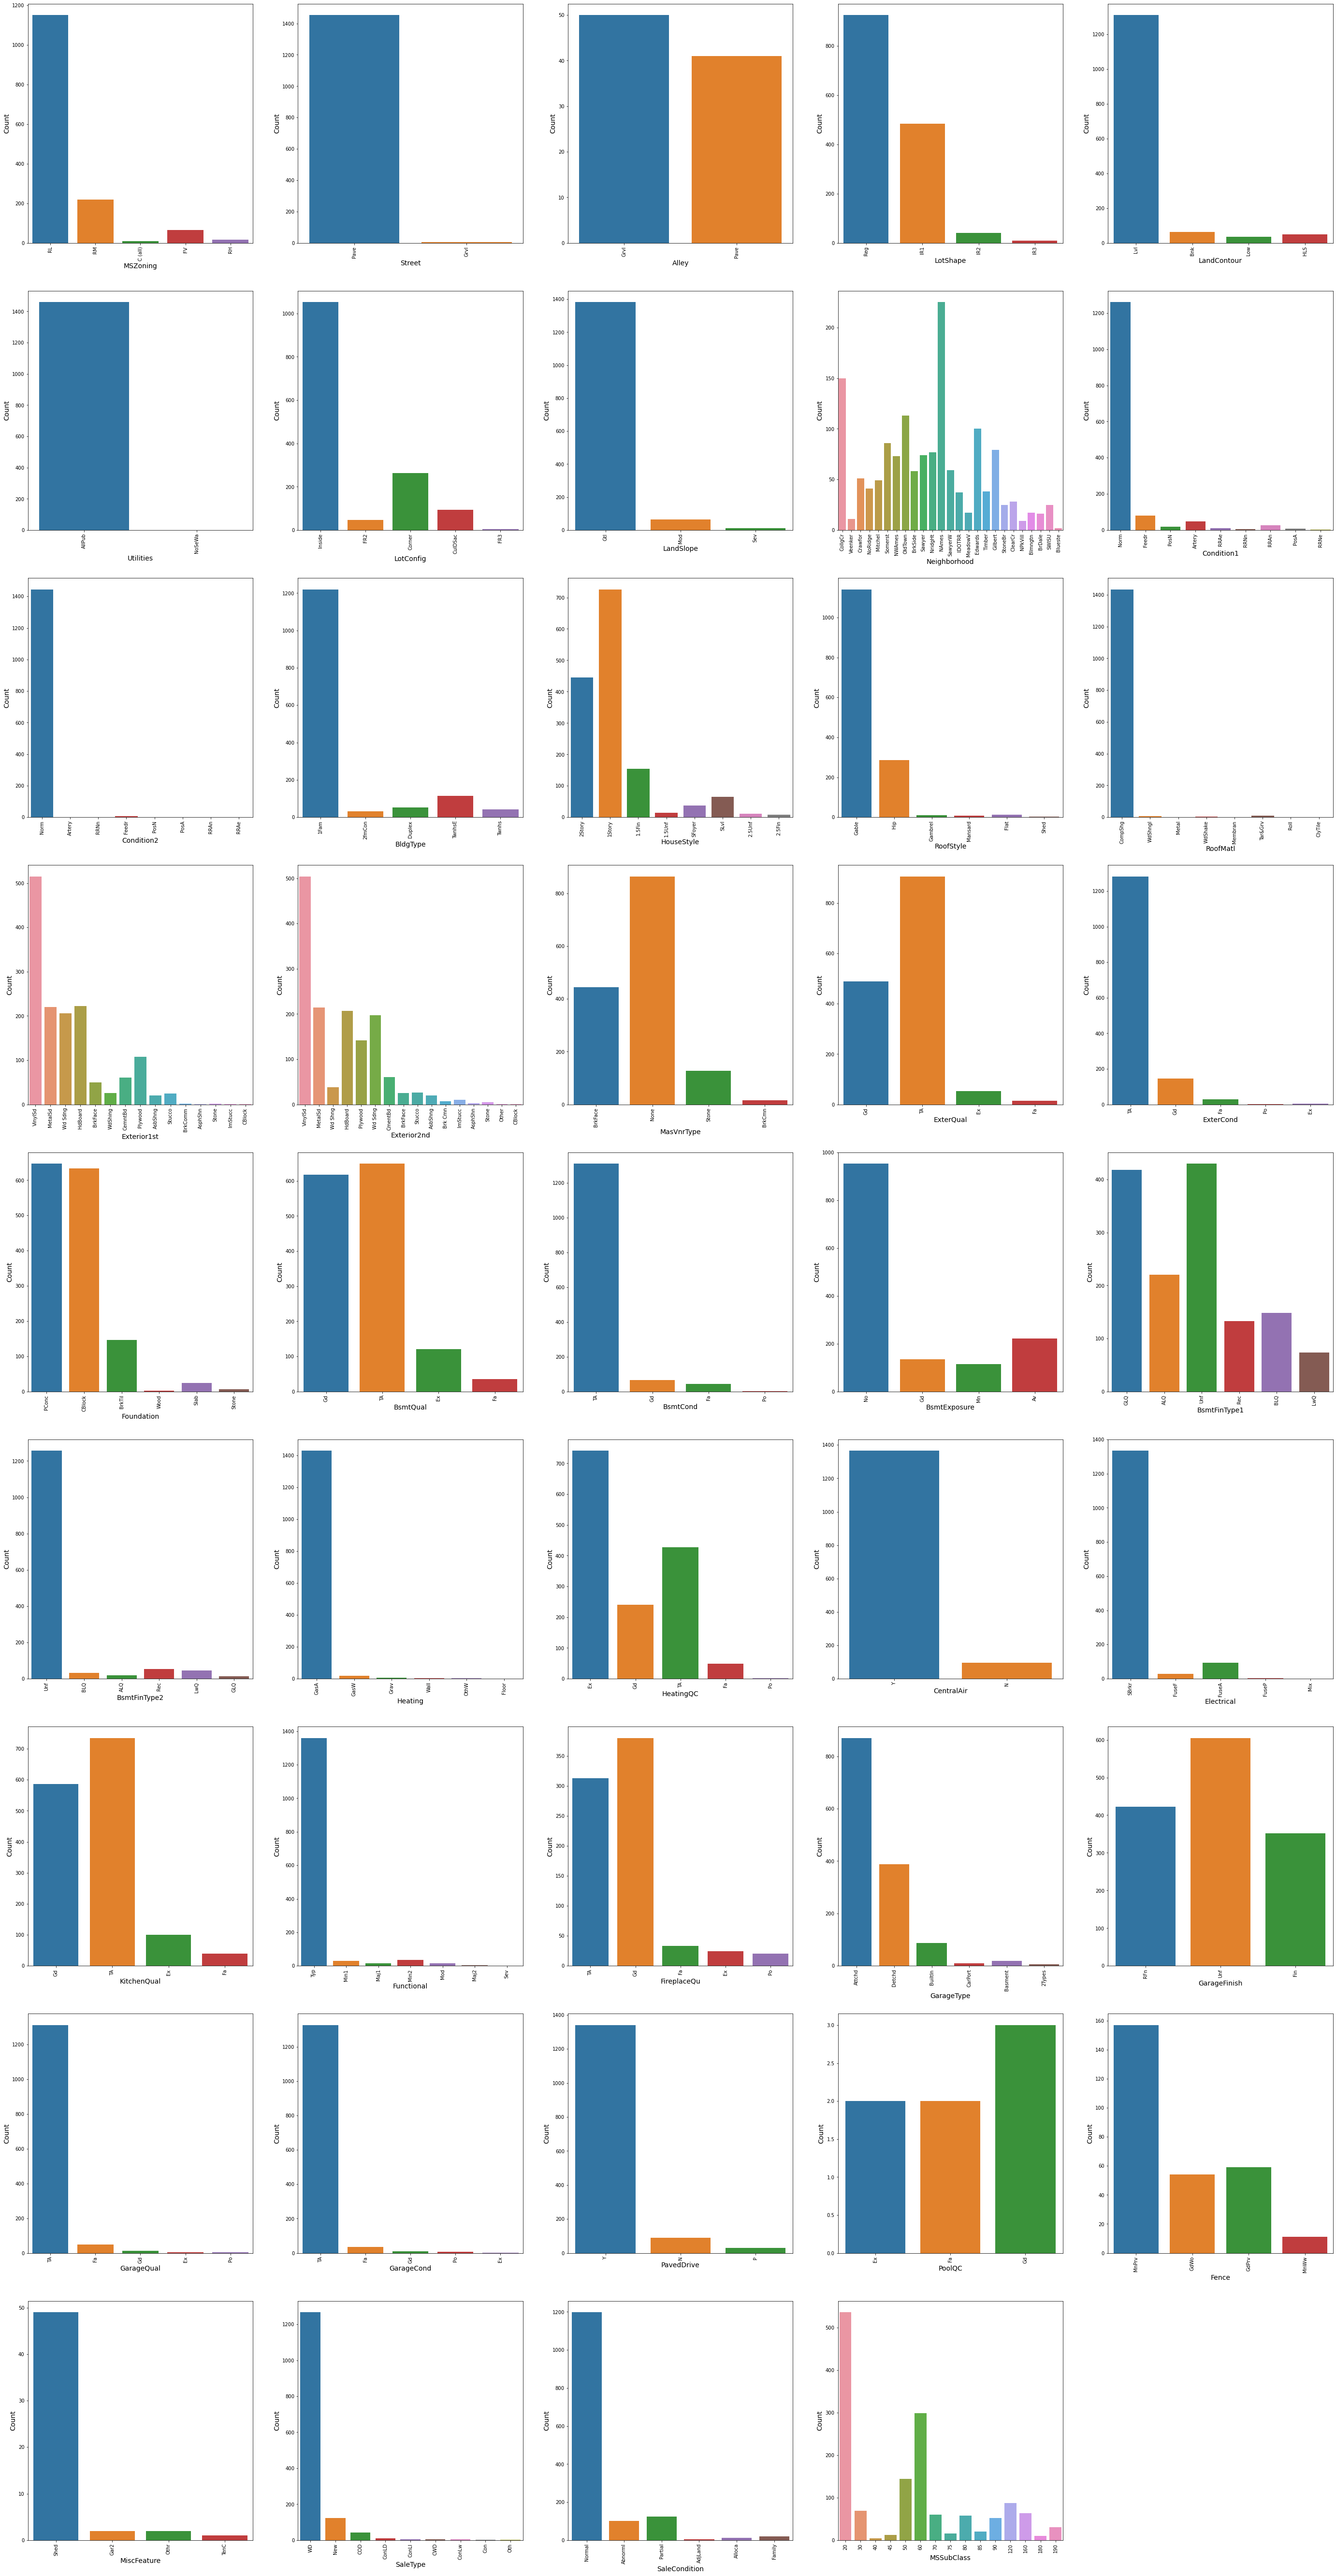

In [15]:
fig = plt.figure(figsize=(20,100))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=3)
for i, feature in enumerate(list(object_X.columns), 1):
    plt.subplot(len(list(numeric_X)), 5, i)
    sns.countplot(x=object_X.loc[:,feature].dropna(), data=object_X.dropna())
    
    plt.xticks(rotation=90)    
    plt.xlabel('{}'.format(feature), size=14)
    plt.ylabel('Count', size=14)
       
plt.show()

In the above charts of all categorical data, we can see that the columns **Utilities** and **Condition2** mostly contain one value. Therefore, these columns are not useful for determining property values and will be removed in a later processing stage.

**Univariate analysis** allows us to understand individual data attributes. However, with just this approach, we cannot see the relationships between the different data points. Therefore, in the next step, we will perform bivariate analysis.

### Bivariate analysis

Bivariate analysis allows us to examine the relationships between two variables. Different approaches are used for this purpose.

One commonly used practice is the correlation matrix between features. The correlation matrix is an effective tool for discovering linear relationships (correlations) between any two continuous features. Correlation not only helps us determine which features are important for property sale prices but also serves as a means to investigate any multicollinearity among our independent predictors.

Multicollinearity occurs when two or more independent variables are highly correlated with each other. In such cases, it leads to imprecise regression coefficients, affecting our ability to identify the most important features that are most useful for our model.

Let's create a correlation matrix now.

#### Matryca korelacji

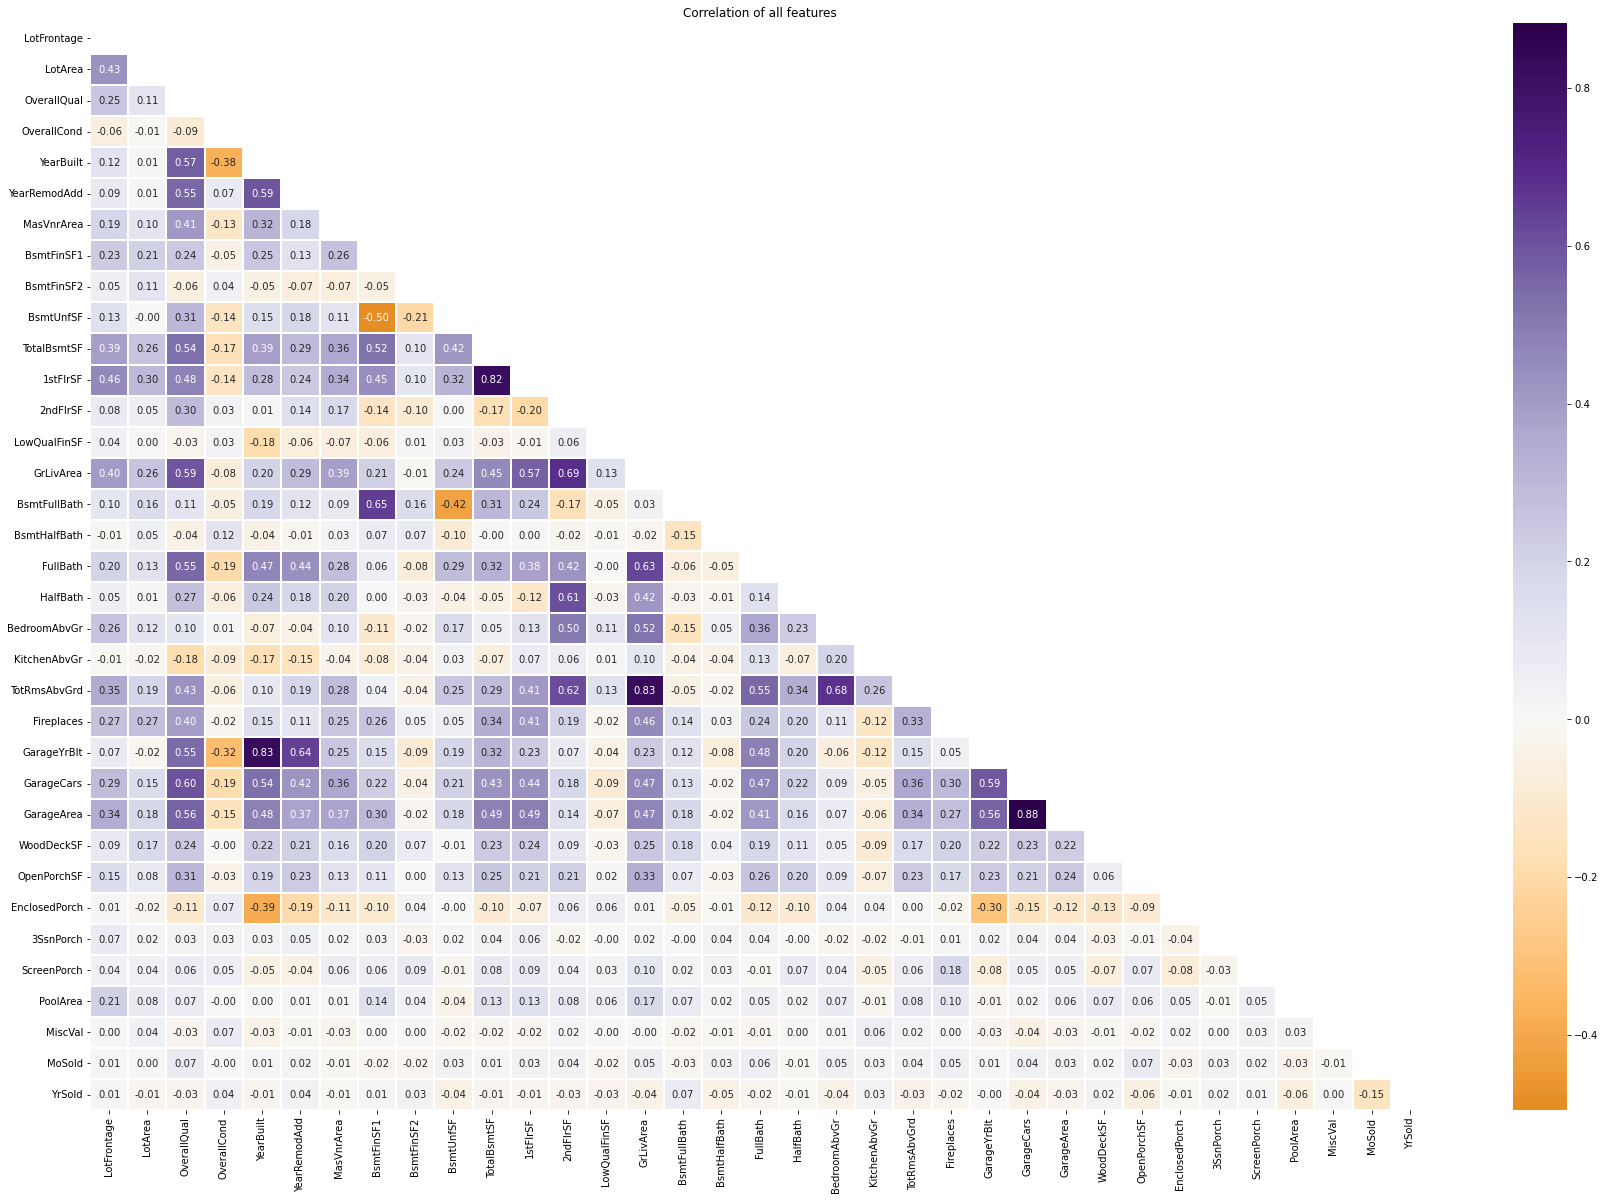

In [16]:
# Creat mask
mask = np.zeros_like(numeric_X.corr())
mask[np.triu_indices_from(mask)] = True

# Heatmap of correlation
plt.figure(figsize=(30,20))
sns.heatmap(numeric_X.corr(), mask=mask, annot=True, cmap ='PuOr', square=False, linewidths=0.4, fmt=".2f", center=0)
plt.title("Correlation of all features")
plt.show()

Let's check where multicollinearity occurs (correlation values above 0.8). For this purpose, I wrote a function that extracts pairs of features with high correlation.

In [17]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = (xFiltered.unstack().drop_duplicates().dropna()).unstack()
    return xFlattened

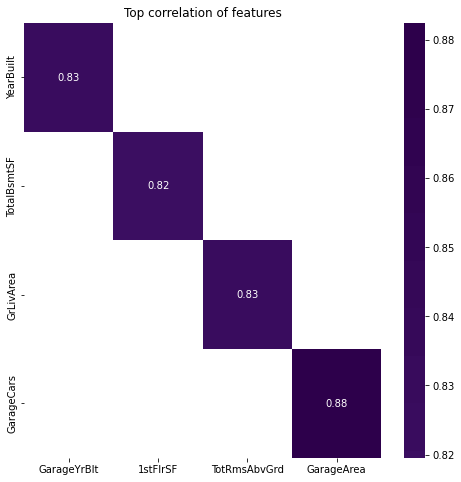

In [18]:
top_corr = corrFilter(numeric_X, .8)

# Heatmap of correlation
plt.figure(figsize=(8,8))
sns.heatmap(top_corr, annot=True, cmap ='PuOr', square=False, fmt=".2f", center=0)
plt.title("Top correlation of features")
plt.show()

From the correlation matrix above, we see that there are 4 pairs of variables that are strongly correlated with each other. This information will help me in later stages of preliminary processing, as I will aim to remove highly correlated features to avoid loss of performance in our model.

#### The relationship between the target variable and the other variables

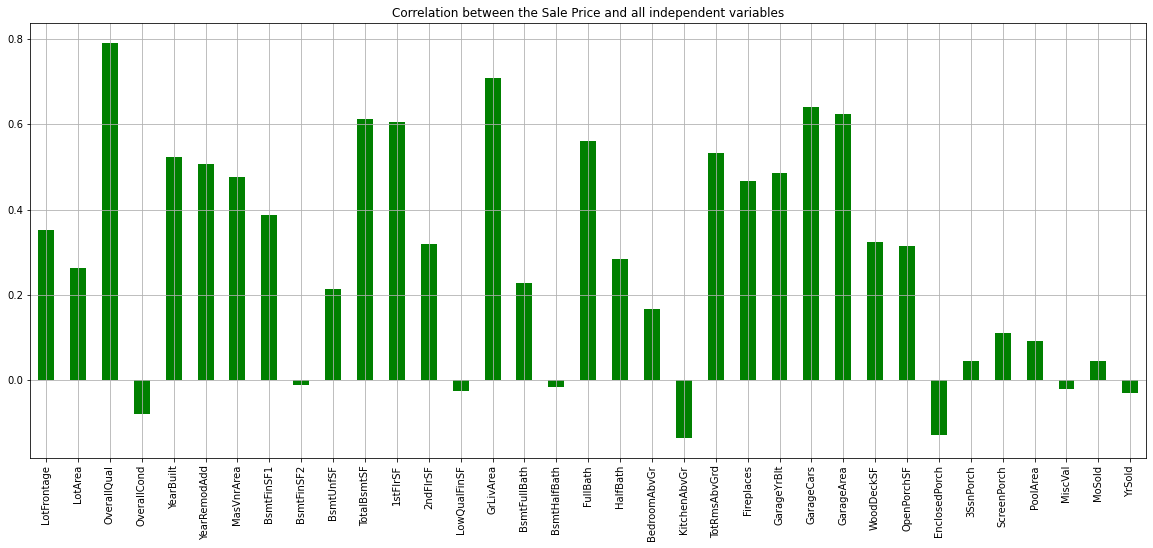

In [19]:
numeric_X.corrwith(Y.SalePrice).plot(    #.drop('SalePrice', axis=1)
    kind='bar', grid=True, figsize=(20, 8), 
    title="Correlation between the Sale Price and all independent variables", color="green");

In [20]:
correlation = numeric_X.corrwith(Y.SalePrice)
pd.DataFrame(correlation.sort_values(ascending=False),columns=['SalePrice'])

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


From the above plot, it appears that two features (OverallQual and GrLivArea) are most strongly correlated with the target variable. These features are likely to have the greatest impact on predicting property prices.

#### Scatterplot

Using scatter plots can also help us identify potential linear relationships between numerical features. While scatter plots do not provide quantitative evidence of the strength of linear relationships between features, they are useful for visualizing any relationships that the correlation matrix might not capture, such as quadratic or exponential relationships.

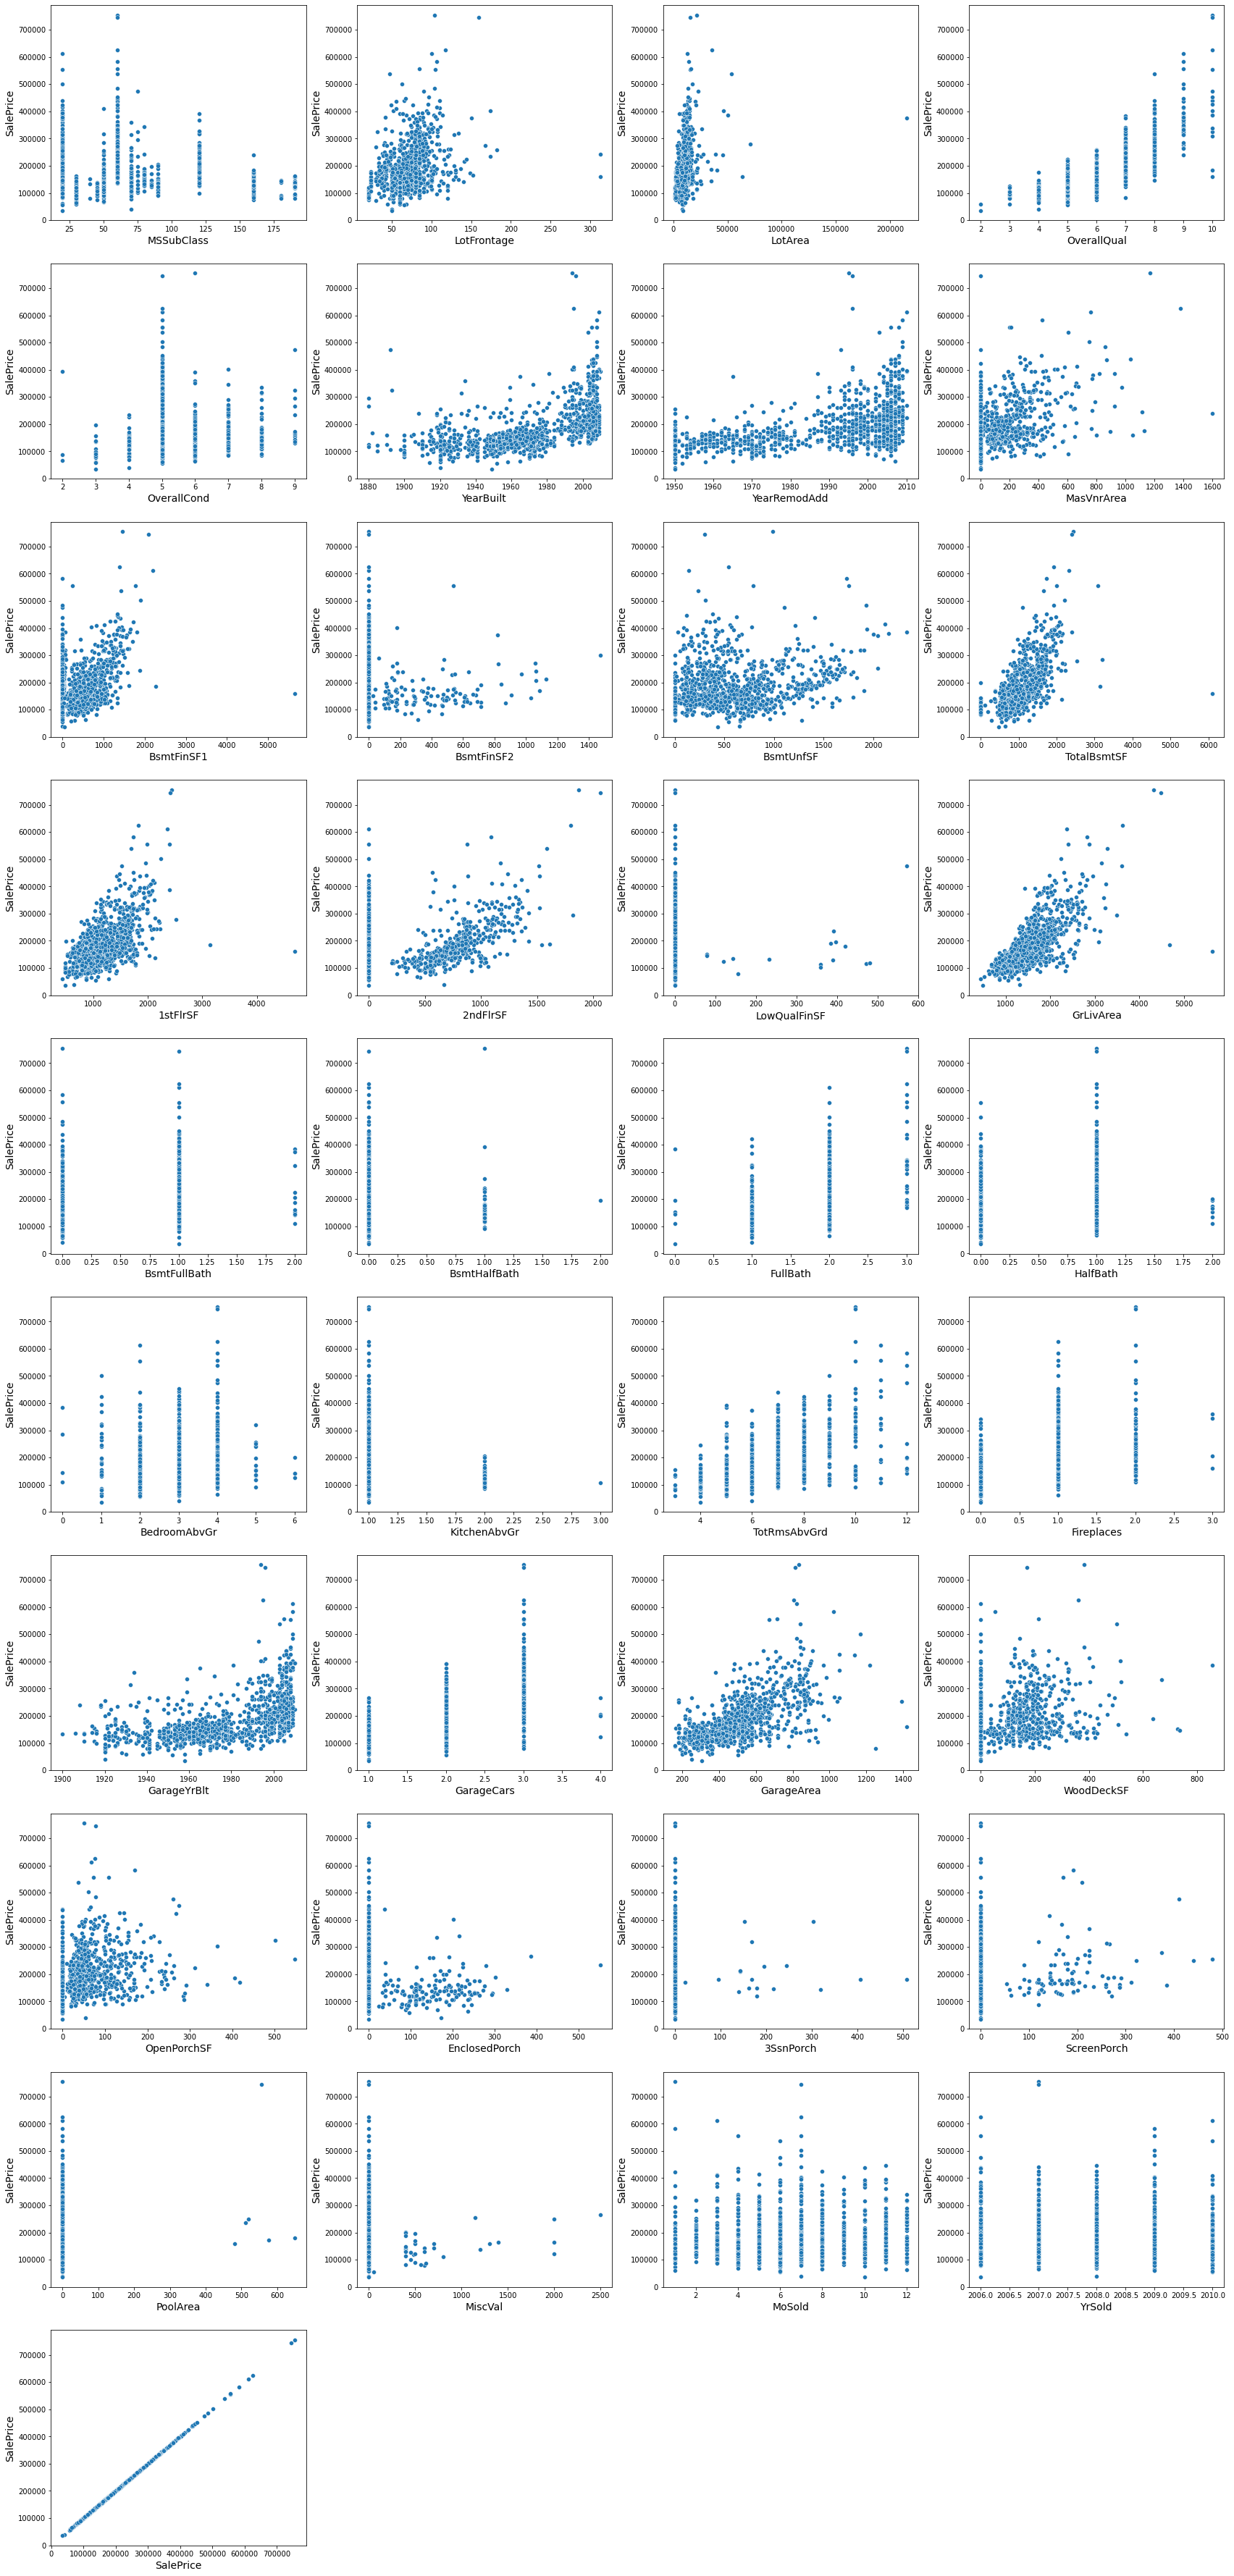

In [21]:
numeric_train = train.select_dtypes(exclude=['object'])

fig = plt.figure(figsize=(12,100))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
for i, feature in enumerate(list(numeric_train.columns), 0):
    if(feature=='Id'):
        continue
#     if(feature=='MoSold'):
#         break
    plt.subplot(len(list(numeric_train)), 4, i)
    sns.scatterplot(x=feature, y='SalePrice', data=numeric_train.dropna())
  
    plt.xlabel('{}'.format(feature), size=14)
    plt.ylabel('SalePrice', size=14)

plt.show()

### Data processing

At this stage, we will perform basic data preparation that enables exploratory data analysis (EDA). Each process will be carried out using transformers—either built-in or custom. This allows us to perform all processes in a pipeline mode.

X = train.drop(['SalePrice'], axis=1)

y = train[['SalePrice']]

Now that we have roughly finished analyzing our data and drawing conclusions through various analyses and visualizations, we will need to use these insights to make decisions about preprocessing. This will ensure that we have clean and error-free data for our model to train on later.

We don't perform visualizations and analyses just to create nice charts or for the sake of doing so; IT IS ESSENTIAL FOR OUR PREPROCESSING!

This section describes the data processing steps:
1. Removing unnecessary features
2. Handling errors and dealing with outliers
3. Imputing missing values
4. Addressing skewed target variable
5. Preparing data for pipeline processing

#### Removing unnecessary features

In [22]:
# transformer for drop column
class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, column_name=[]):
        self.column_name = column_name

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.column_name, axis=1, inplace=False)

##### Features with multicollinearity

Based on the correlation matrix below, we identified certain features that are strongly correlated:

1. GarageYrBlt and YearBuilt
2. TotRmsAbvGrd and GrLivArea
3. 1stFlrSF and TotalBsmtSF
4. GarageArea and GarageCars

We will remove highly correlated features to avoid the previously discussed issue of multicollinearity.

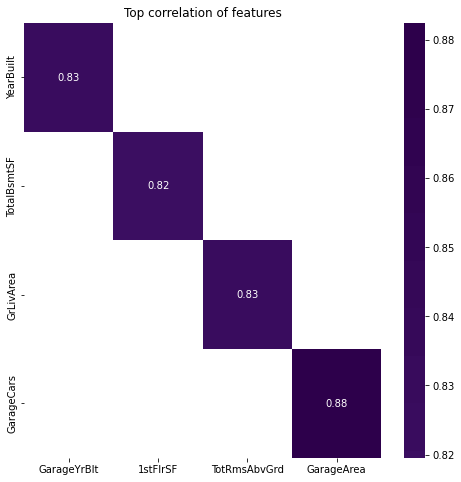

In [23]:
# Heatmap of correlation
plt.figure(figsize=(8,8))
sns.heatmap(top_corr, annot=True, cmap ='PuOr', square=False, fmt=".2f", center=0)
plt.title("Top correlation of features")
plt.show()

In [24]:
multicollinearity_columns = ['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars']

##### Useless Features in Predicting SalePrice

We will also remove features that do not have a linear relationship with the target price, SalePrice. The plot below shows that MoSold and YrSold have no impact on the sale price of the house.

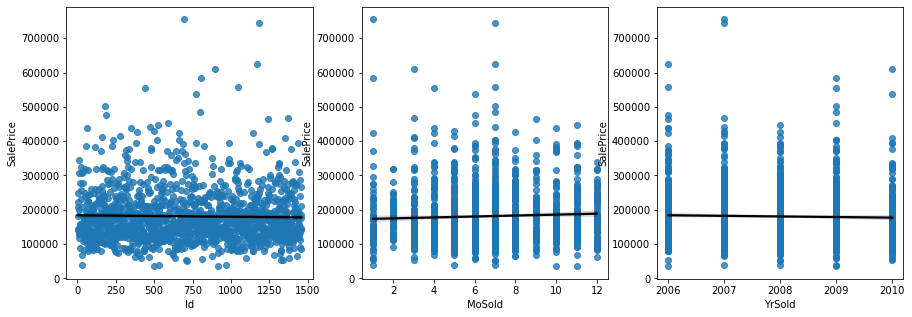

In [25]:
fig,axes = plt.subplots(1,3, figsize=(15,5))
sns.regplot(x=numeric_train['Id'], y='SalePrice', data=numeric_train, ax = axes[0], line_kws={'color':'black'})
sns.regplot(x=numeric_train['MoSold'], y='SalePrice', data=numeric_train, ax = axes[1], line_kws={'color':'black'})
sns.regplot(x=numeric_train['YrSold'], y='SalePrice', data=numeric_train, ax = axes[2],line_kws={'color':'black'})
plt.show()

The Id variable and variables showing the number of properties sold in a given month and year do not affect the price of these properties. These three variables will be removed in the next stage.

In [26]:
useless_columns = ['Id','MoSold','YrSold'] 

##### Variables with too many missing values

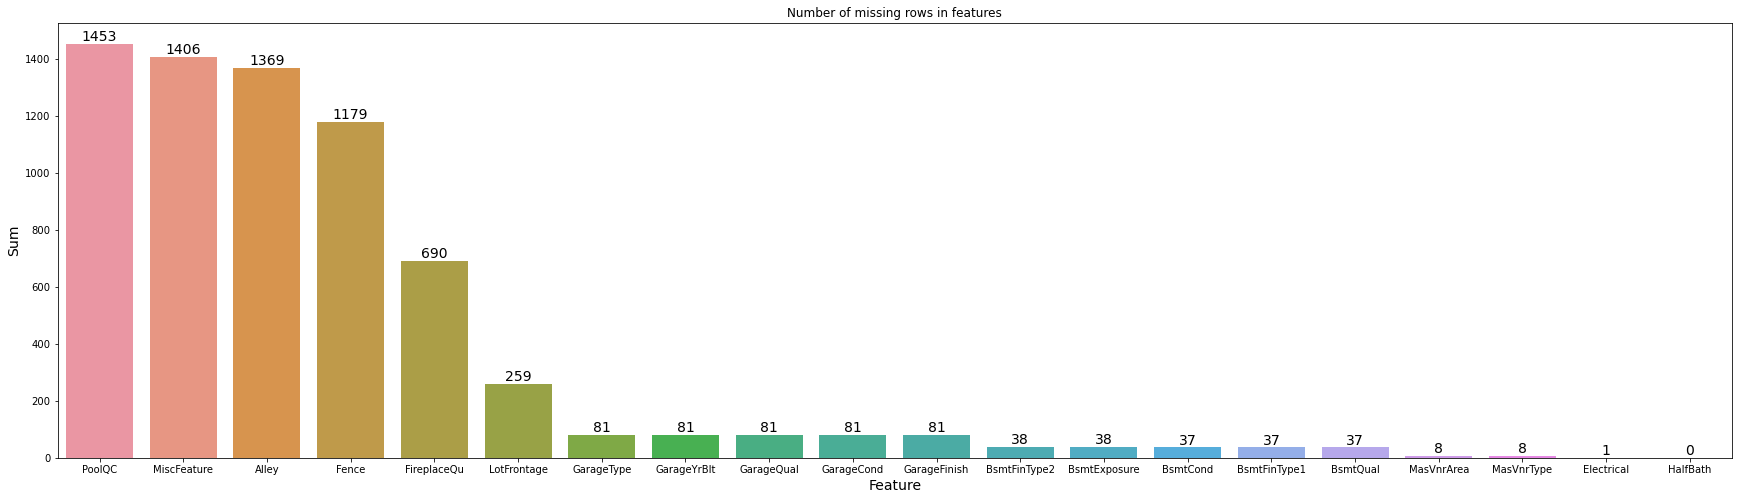

In [27]:
missing = pd.DataFrame(X.isnull().sum(),columns=['Sum']).sort_values(by=['Sum'],ascending=False).head(20).reset_index()
missing.columns = ['Feature','Sum']

plt.figure(figsize=(30,8))
plt.title('Number of missing rows in features')
ax = sns.barplot(x=missing.Feature,y=missing.Sum, data = missing)
ax.bar_label(ax.containers[0], fontsize=14);
plt.xlabel('Feature', size=14)
plt.ylabel('Sum', size=14)
plt.show()

The variables PoolQC, MiscFeature, Alley, and Fence have too many missing values. They will be removed in the next stage.

In [28]:
na_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']

##### Variables that mostly have only one value

During univariate analysis, we found features that predominantly have only one value or values equal to 0. These features will not be useful for estimating property values. I will search for all numerical and categorical columns that contain at least 95% of the same values or values equal to 0.

In [29]:
over_columns = []
for i in X.columns:
    counts = X[i].value_counts()  #Suma danej wartości każdej zmiennej
    zeros = counts.iloc[0]   #value_counts już sortuje wartości, od największej do najmniejszej, dlatego 1 wartość będzie największa
    if zeros / len(X) * 100 > 95:  #jeśli wartość tych samych danych będzie większa niż 95% wszystkich wartości wtedy je wybieramy
        over_columns.append(i)
        
print(over_columns)

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']


The above variables, both numerical and categorical, mostly contain only one value, so they will be removed in the next stage.

**After checking all columns, I will create a single list of columns that will be removed later.**

In [30]:
redundant_columns = multicollinearity_columns + useless_columns + na_columns + over_columns
len(redundant_columns)

21

A total of 21 variables will be removed.

#### Handling Errors and Dealing with Outliers

In [31]:
# transformer for removing or replacing bad values
    # Possibilities:
    # outliers (Winsorize method) --> Nan
    # convert datatype
    # replace NaN values --> "NA"

class RepairColumns(BaseEstimator,TransformerMixin):
    def __init__(self, col_name, out_type, replace=None, W_outliers=False):
        self.col_name = col_name            # column name - string
        self.out_type = out_type            # output column type - string ['int64'/'category']
        self.replace = replace              # replace 1st value in list for 2nd - list with two elements
        self.W_outliers = W_outliers        # use outliers filter - True/False
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X): 
        # change col type
        if self.out_type == 'Int64':
            X[self.col_name] = X[self.col_name].astype(float)
            X[self.col_name] = X[self.col_name].astype(self.out_type)
        else:
            X[self.col_name] = X[self.col_name].astype(self.out_type)
            
        # replacing values
        if self.replace: 
            X[self.col_name].replace(self.replace[0], self.replace[1], inplace=True, regex=True)
            
        # drop outliers
        if self.W_outliers:
            not_null_values = X[X[self.col_name].notnull()][self.col_name]
            p95, p5 = np.percentile(not_null_values, [95 , 5])
            w = p95 - p5
            outlier_rows = X[(X[self.col_name] < p5 - 1.5 * w) | (X[self.col_name] > p95 + 1.5 * w)]
            X.loc[outlier_rows.index, self.col_name] = np.nan
        
        return X

##### Changing dtype from numerical to categorical

In [32]:
obj_col = ['MSSubClass', 'OverallQual', 'OverallCond']

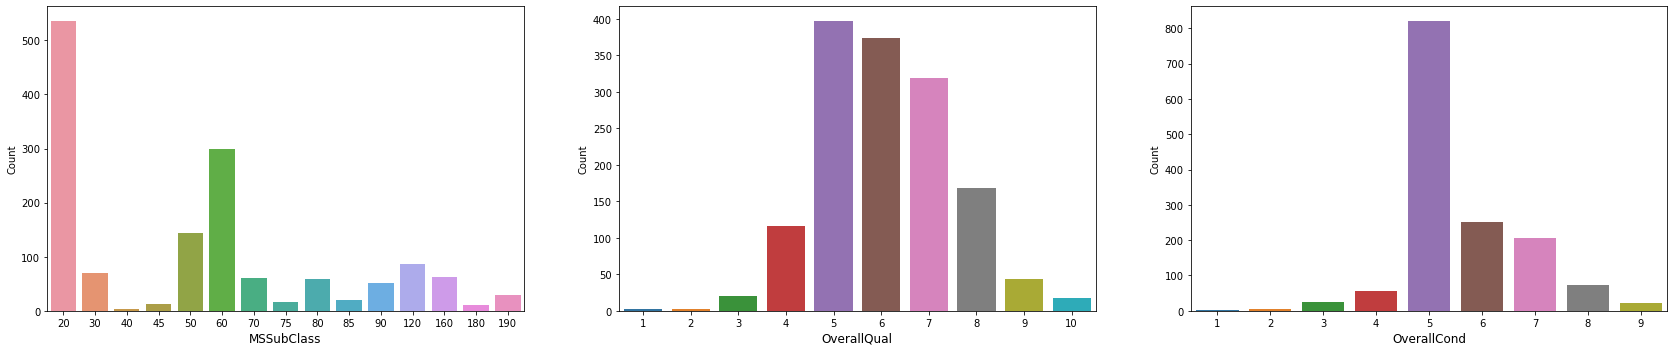

In [33]:
fig = plt.figure(figsize=(12,5))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=3)
for i, feature in enumerate(obj_col, 1):
    plt.subplot(len(obj_col), 3, i)
    sns.countplot(x=X.loc[:,feature].dropna(), data=X.dropna())
     
    plt.xlabel('{}'.format(feature), size=12)
    plt.ylabel('Count', size=10)
plt.show()

The above variables, although numerical, behave like categorical features, so their type will be changed in a later stage.

##### Handling Outliers

Removing outliers will prevent extreme values from impacting the performance of our models. In our previous boxplot, I identified the following variables with extreme outlier values:

- LotFrontage
- LotArea
- BsmtFinSF1
- TotalBsmtSF
- GrLivArea

We will remove the outliers based on a certain threshold value.

In [34]:
outliers_col = ['LotFrontage','LotArea','BsmtFinSF1','TotalBsmtSF','GrLivArea']

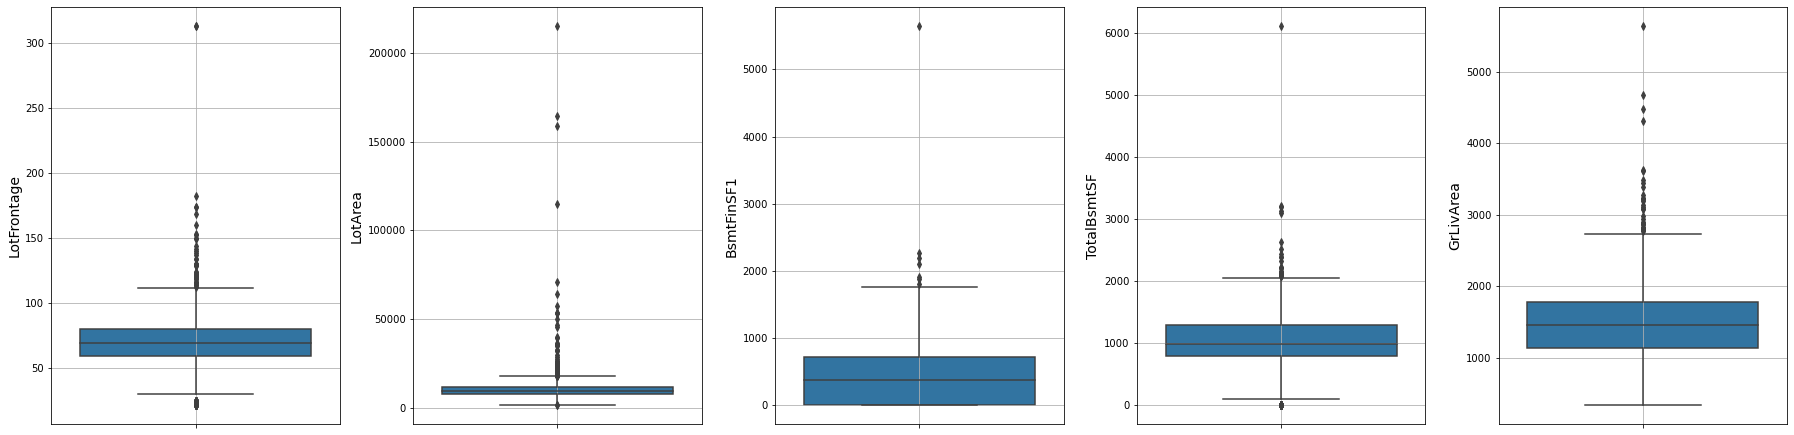

In [35]:
# visualising some more outliers in the data values
fig = plt.figure(figsize=(25,30))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
for i, feature in enumerate(outliers_col, 1):
    plt.subplot(len(outliers_col), 5, i)
    sns.boxplot(y=feature, data=X)
        
    plt.ylabel('{}'.format(feature), size=14)
    plt.grid(True)

fig.tight_layout(pad=1)        
plt.show()

Thanks to these plots, we can determine at which values outliers occur. They will be removed in a later stage.

#### Handling Missing Data

In [36]:
# dedicated transformer for fill in NaN values
class FillNa(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
        
    # function to fill in numeric columns
    def fill_in_numeric(self, df):
        df_numerics = df.select_dtypes(include='number')
        numerics_col_names = df_numerics.columns
        
        SI_numerics = SimpleImputer(missing_values=np.nan, strategy='median') # <-- define strategy
        filed_numerics = SI_numerics.fit_transform(df_numerics)
        filed_numerics = pd.DataFrame(filed_numerics, columns=numerics_col_names)
        return filed_numerics
    
    # function to fill in category columns
    def fill_in_category(self, df):
        df_category = df.select_dtypes(exclude='number')
        category_col_names = df_category.columns
        
        SI_category = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # <-- define strategy
        filed_category = SI_category.fit_transform(df_category)
        filed_category = pd.DataFrame(filed_category, columns=category_col_names)
        return filed_category
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        filed_numerics = self.fill_in_numeric(X)
        filed_category = self.fill_in_category(X)
        
        return pd.concat([filed_numerics, filed_category], axis=1)

#### Feature Engineering

##### Preparing Pipelines for Our Data

Now that I am familiar with our data, I can proceed to create pipelines to process it.

In [37]:
preprocess_pipe = Pipeline([('Remove Redundant Column', ColumnDropper(redundant_columns)),
                           
                           ('Change Type of MSSubClass Column', RepairColumns('MSSubClass', 'object', replace=None, W_outliers=False)),
                           ('Change Type of OverallQual Column', RepairColumns('OverallQual', 'object', replace=None, W_outliers=False)),
                           ('Change Type of OverallCond Column', RepairColumns('OverallCond', 'object', replace=None, W_outliers=False)),
                           ('Change Type of MasVnrArea Column', RepairColumns('MasVnrArea', 'Int64', replace=None, W_outliers=False)),
                           ('Change Type of BsmtFinSF2 Column', RepairColumns('BsmtFinSF2', 'Int64', replace=None, W_outliers=False)),
                           ('Change Type of BsmtUnfSF Column', RepairColumns('BsmtUnfSF', 'Int64', replace=None, W_outliers=False)),
                           ('Change Type of BsmtHalfBath Column', RepairColumns('BsmtHalfBath', 'Int64', replace=None, W_outliers=False)),
                           ('Change Type of GarageArea Column', RepairColumns('GarageArea', 'Int64', replace=None, W_outliers=False)),
                           ('Change Type of BsmtFullBath Column', RepairColumns('BsmtFullBath', 'Int64', replace=None, W_outliers=False)),
                           
                           ('Change Type and Drop Outliears of LotFrontage Column', RepairColumns('LotFrontage', 'Int64', replace=None, W_outliers=True)),
                           ('Change Type and Drop Outliears BsmtFinSF1 Column', RepairColumns('BsmtFinSF1', 'Int64', replace=None, W_outliers=True)),
                           ('Change Type and Drop Outliears TotalBsmtSF Column', RepairColumns('TotalBsmtSF', 'Int64', replace=None, W_outliers=True)),                                                      
                           
                           ('Replace NaN values of FireplaceQu Column', RepairColumns('FireplaceQu', 'object', replace=[np.nan, "NA"], W_outliers=False)),
                           ('Replace NaN values of GarageType Column', RepairColumns('GarageType', 'object', replace=[np.nan, "NA"], W_outliers=False)),
                           ('Replace NaN values of GarageFinish Column', RepairColumns('GarageFinish', 'object', replace=[np.nan, "NA"], W_outliers=False)),
                           ('Replace NaN values of GarageQual Column', RepairColumns('GarageQual', 'object', replace=[np.nan, "NA"], W_outliers=False)),
                           ('Replace NaN values of GarageCond Column', RepairColumns('GarageCond', 'object', replace=[np.nan, "NA"], W_outliers=False)),
                           ('Replace NaN values of BsmtQual Column', RepairColumns('BsmtQual', 'object', replace=[np.nan, "NA"], W_outliers=False)),
                           ('Replace NaN values of BsmtCond Column', RepairColumns('BsmtCond', 'object', replace=[np.nan, "NA"], W_outliers=False)),
                           ('Replace NaN values of BsmtExposure Column', RepairColumns('BsmtExposure', 'object', replace=[np.nan, "NA"], W_outliers=False)),
                           ('Replace NaN values of BsmtFinType1 Column', RepairColumns('BsmtFinType1', 'object', replace=[np.nan, "NA"], W_outliers=False)),
                           ('Replace NaN values of BsmtFinType2 Column', RepairColumns('BsmtFinType2', 'object', replace=[np.nan, "NA"], W_outliers=False)),                           
                           
                           ('Drop Outliears LotArea Column', RepairColumns('LotArea', 'Int64', replace=None, W_outliers=True)),
                           ('Drop Outliears GrLivArea Column', RepairColumns('GrLivArea', 'Int64', replace=None, W_outliers=True)),
                           
                           ('Filling NaN values', FillNa())                        
                          ])

In [38]:
# the complete process is performed on the matrix X in one pipeline
X_processing_pipe = Pipeline([('Preprocessing', preprocess_pipe)])

In [39]:
%%time

X_processing_pipe.fit(X)

X_transform = X_processing_pipe.transform(X)
test_transform = X_processing_pipe.transform(test)

CPU times: total: 109 ms
Wall time: 153 ms


In [40]:
X_transform.shape

(1460, 59)

##### Creating New Features

With the cleaned data, we can create new features by summing related variables.

Creating **TotalLot** will help me identify the total land area available. **TotalSF** will calculate the total house area by summing the basement and the two floors. **TotalBath** will indicate the total number of bathrooms. **TotalPorch** will sum up all the different types of porches around the house.

- TotalLot = LotFrontage + LotArea
- TotalSF = TotalBsmtSF + 2ndFlrSF
- TotalBath = FullBath + HalfBath
- TotalPorch = OpenPorchSF + EnclosedPorch + ScreenPorch
- TotalBsmtFin = BsmtFinSF1 + BsmtFinSF2

In [41]:
X_transform['TotalLot'] = X_transform['LotFrontage'] + X_transform['LotArea']
X_transform['TotalBsmtFin'] = X_transform['BsmtFinSF1'] + X_transform['BsmtFinSF2']
X_transform['TotalSF'] = X_transform['TotalBsmtSF'] + X_transform['2ndFlrSF']
X_transform['TotalBath'] = X_transform['FullBath'] + X_transform['HalfBath']
X_transform['TotalPorch'] = X_transform['OpenPorchSF'] + X_transform['EnclosedPorch'] + X_transform['ScreenPorch']

In [42]:
X_transform.shape

(1460, 64)

#### Converting Categorical Variables to Numeric

Since machine learning models learn only from numerical data, we will convert the remaining categorical columns to numerical using *get_dummies()*. This will make them suitable for feeding into our machine learning algorithm.

In [43]:
## OHE transformer using get_dummies
class TransformerEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = pd.get_dummies(X, drop_first=True)
        return X

In [44]:
# feature engineering
X_OHE_pipe = Pipeline([('OHE on non-numeric columns', TransformerEncoder())])

In [45]:
%%time

X_OHE_pipe.fit(X_transform)

X_transform_OHE = X_OHE_pipe.transform(X_transform)
test_transform_OHE = X_OHE_pipe.transform(test_transform)

CPU times: total: 62.5 ms
Wall time: 94.4 ms


#### Handling Skewness of the Target Variable - SalePrice

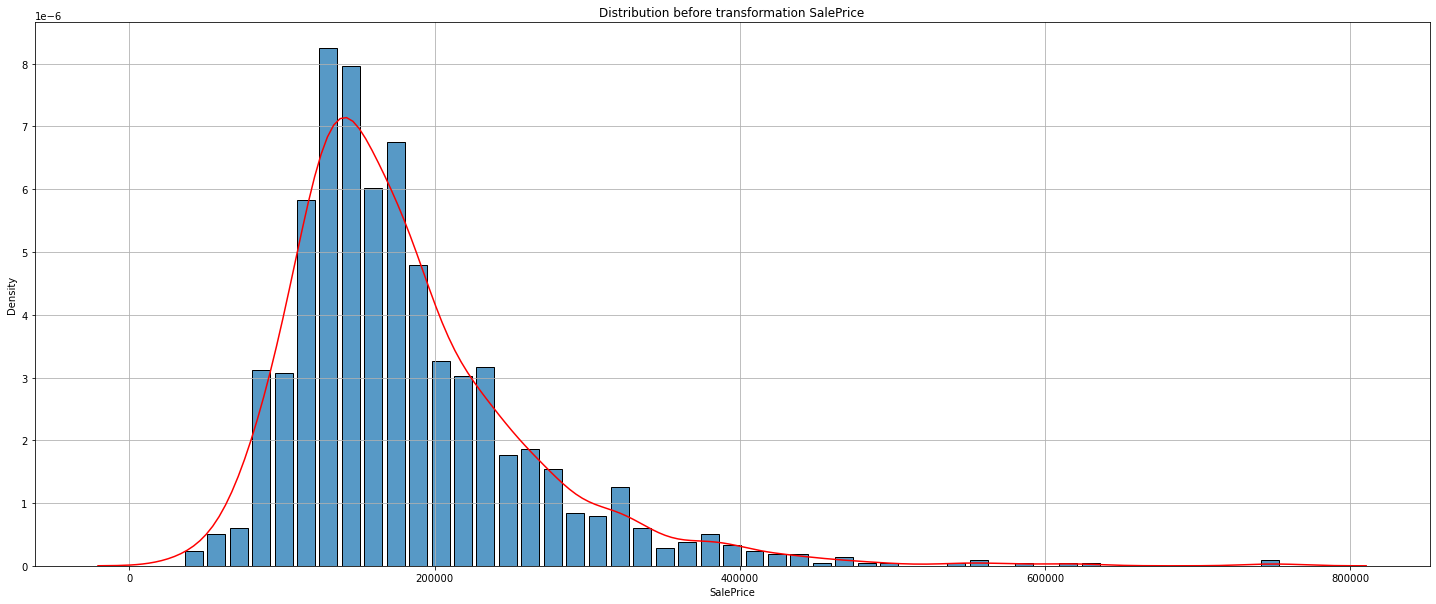

In [46]:
# check distribution 
fig = plt.figure(figsize=(25,10))
ax = sns.histplot(data=Y, x="SalePrice", kde=False, stat="density", shrink=.8)
sns.kdeplot(data=Y, x="SalePrice", color='r', ax=ax)

plt.title("Distribution before transformation SalePrice")
plt.grid(True)

plt.show()

The distribution is right-skewed, where the tail on the right side of the curve is longer than the tail on the left side, and the mean is greater than the mode. This situation is also known as positive skewness.

Having a skewed target will impact the overall performance of our machine learning model, so one way to mitigate this is to apply a logarithmic transformation to the skewed target. In our case, this will involve transforming the sale prices to reduce the skewness of the distribution.

In [47]:
# skewness and kurtosis
print("Skewness: %f" % Y.skew())
print("Kurtosis: %f" % Y.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Now I will perform a logarithmic transformation on the target variable, SalePrice.

In [234]:
Y['SalePrice'] = np.log(Y['SalePrice']).copy()

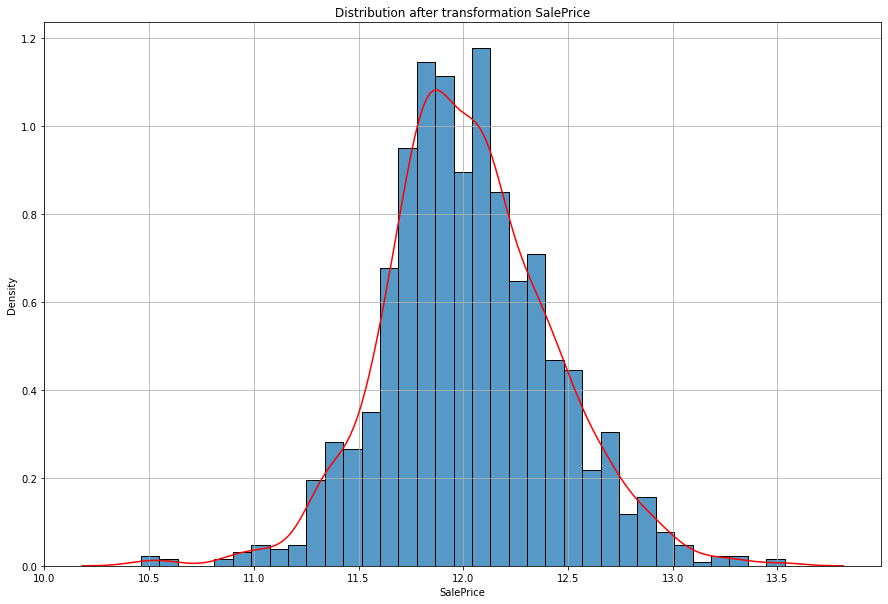

In [49]:
# check the new distribution 
fig = plt.figure(figsize=(15,10))
ax = sns.histplot(data=Y, x="SalePrice", kde=False, stat="density")
sns.kdeplot(data=Y, x="SalePrice", color='r', ax=ax)

plt.title("Distribution after transformation SalePrice")
plt.grid(True)

plt.show()

In [50]:
# skewness and kurtosis
print("Skewness: %f" % Y.skew())
print("Kurtosis: %f" % Y.kurt())

Skewness: 0.121335
Kurtosis: 0.809532


### Scaling the Data

RobustScaler is a transformation technique that removes the median and scales the data according to the range of quantiles (by default, the interquartile range, IQR).

IQR is the range between the 1st quartile (25th percentile) and the 3rd quartile (75th percentile).

It is also robust to outliers, making it an ideal solution for data with many outliers, which could otherwise drastically reduce the size of the training data.

Fit the scaler only to the training data, and then transform both the training and test data.

In [51]:
rs = RobustScaler()
rs.fit(X_transform_OHE)
X_rs = rs.transform(X_transform_OHE)

### Data Modeling

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rs, Y, test_size=0.2, random_state=2024)
print('X_train:', X_train.shape,'y_train:', y_train.shape)
print('X_test:', X_test.shape,'y_test:', y_test.shape)

X_train: (1168, 247) y_train: (1168, 1)
X_test: (292, 247) y_test: (292, 1)


#### Modeling

In [58]:
%%time

# building pipeline
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=2022),
    'Lasso': Lasso(random_state=2022),
    'ElasticNet': ElasticNet(random_state=2022),
    'SVR': SVR(),
    'RandomForestRegressor': RandomForestRegressor(random_state=2022),
    'XGBRegressor': XGBRegressor(random_state=2022),
    'CatBoostRegressor': CatBoostRegressor(random_state=2022, silent=True),
    'LGBMRegressor': LGBMRegressor(random_state=2022, verbose=-1)  
}

params = {}


CPU times: total: 0 ns
Wall time: 1.03 ms


In [54]:
# setup cross validation folds
kf = KFold(n_splits=10, random_state=2022, shuffle=True)

In [59]:
%%time

results = []
loop_start = time()

for name, model in models.items():
    now = time()
    pipeline = Pipeline([('model', model)])
    
    if name in params:
        grid_search = GridSearchCV(pipeline, params[name], cv=kf)
    else:
        grid_search = GridSearchCV(pipeline, {}, cv=kf)
        
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    
    # metrics
    explained_variance = metrics.explained_variance_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred) 
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append({
        'Model': name,
        'Explained variance score': explained_variance,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'R-Squared Score': r2,
        'RMSE Score': rmse,
        'Best Parameters': grid_search.best_params_
    })
    print('\nModel {} - Done | Time: {} sec.'.format(name, round(now-loop_start,2)))
    print('---------------------------------')

results_df = pd.DataFrame(results).sort_values(by=['RMSE Score']).reset_index(drop=True)
results_df.index=np.arange(1, len(results_df)+1)


Model LinearRegression - Done | Time: 0.0 sec.
---------------------------------

Model Ridge - Done | Time: 0.4 sec.
---------------------------------

Model Lasso - Done | Time: 0.52 sec.
---------------------------------

Model ElasticNet - Done | Time: 0.68 sec.
---------------------------------

Model SVR - Done | Time: 0.81 sec.
---------------------------------

Model RandomForestRegressor - Done | Time: 2.63 sec.
---------------------------------

Model XGBRegressor - Done | Time: 24.88 sec.
---------------------------------

Model CatBoostRegressor - Done | Time: 30.08 sec.
---------------------------------

Model LGBMRegressor - Done | Time: 108.78 sec.
---------------------------------
CPU times: total: 3min 4s
Wall time: 1min 58s


In [60]:
results_df

,Model,Explained variance score,Mean Absolute Error,Mean Squared Error,R-Squared Score,RMSE Score,Best Parameters
1,CatBoostRegressor,0.909442,0.083582,0.014865,0.907779,0.121922,{}
2,Ridge,0.909229,0.086237,0.014908,0.907510,0.122100,{}
3,LinearRegression,0.893529,0.093500,0.017417,0.891945,0.131975,{}
4,LGBMRegressor,0.883895,0.094259,0.019022,0.881990,0.137920,{}
5,RandomForestRegressor,0.878227,0.093777,0.019728,0.877613,0.140455,{}
6,XGBRegressor,0.858965,0.102041,0.022819,0.858434,0.151059,{}
7,SVR,0.559983,0.196386,0.071445,0.556765,0.267292,{}
8,ElasticNet,0.030667,0.308872,0.156637,0.028243,0.395774,{}
9,Lasso,0.027135,0.309185,0.157190,0.024812,0.396472,{}


### Models with Hyperparameters

We’ve built the basic versions of our regression models. Now let's look for hyperparameters that might improve the performance of our models.

In [61]:
import sklearn.metrics as metrics
def regression_results(model, y_test, y_pred):

    # regression metrics
    explained_variance = metrics.explained_variance_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred) 
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("Regression results - {}".format(model))
    print("---------------------------------------")
    print('Explained variance score: ', round(explained_variance,4))    
    print('Mean Absolute Error: ', round(mae,4))
    print('Mean Squared Error: ', round(mse,4))
    print('R-Squared Score: ', round(r2,4))
    print('RMSE Score: ', round(np.sqrt(mse),4))
    print("\n")


In [62]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print('\nBest score (RMSE): %0.6f' % (best_score))
    print('\nBest parameters found:')
    print(grid.best_params_, '\n')
    
    return best_score

#### Ridge

In [137]:
%%time

# create a pipeline
ridge_model = Ridge()

# create parameter grids
ridge_param_grid  = {'alpha': [0.001, 0.01, 0.05, 0.1, 1, 5, 10, 25, 50, 100],
                     'random_state': [2022]
                    }

grid_search = GridSearchCV(ridge_model, param_grid=ridge_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

ridge_sc = get_best_score(grid_search)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Best score (RMSE): 0.130489

Best parameters found:
{'alpha': 10, 'random_state': 2022} 

CPU times: total: 1.97 s
Wall time: 871 ms


In [138]:
%%time

# create a pipeline
ridge_model = Ridge()

# create parameter grids
ridge_param_grid  = {'alpha': np.arange(5,15.1,0.5),
                     'random_state': [2022]
                    }

grid_search = GridSearchCV(ridge_model, param_grid=ridge_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

ridge_sc = get_best_score(grid_search)

Fitting 10 folds for each of 21 candidates, totalling 210 fits

Best score (RMSE): 0.130375

Best parameters found:
{'alpha': 7.5, 'random_state': 2022} 

CPU times: total: 3.94 s
Wall time: 1.76 s


In [140]:
y_pred = grid_search.predict(X_test)
regression_results(ridge_model, y_test, y_pred)

Regression results - Ridge()
---------------------------------------
Explained variance score:  0.9142
Mean Absolute Error:  0.0842
Mean Squared Error:  0.0141
R-Squared Score:  0.9127
RMSE Score:  0.1186




#### Lasso

In [66]:
%%time

# create a pipeline
lasso_model = Lasso()

# create parameter grids
lasso_param_grid  = {'alpha': [0.001, 0.01, 0.05, 0.1, 1, 5, 10, 25, 50, 100],
                     'random_state': [2022]
                    }

grid_search = GridSearchCV(lasso_model, param_grid=lasso_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

lasso_sc = get_best_score(grid_search)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Best score (RMSE): 0.133990

Best parameters found:
{'alpha': 0.001, 'random_state': 2022} 

CPU times: total: 7.14 s
Wall time: 2.94 s


In [67]:
%%time

# create a pipeline
lasso_model = Lasso()

# create parameter grids
lasso_param_grid  = {'alpha': np.linspace(0.0001,0.01,20),
                     'random_state': [2022]
                    }

grid_search = GridSearchCV(lasso_model, param_grid=lasso_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

lasso_sc = get_best_score(grid_search)

Fitting 10 folds for each of 20 candidates, totalling 200 fits

Best score (RMSE): 0.129095

Best parameters found:
{'alpha': 0.0001, 'random_state': 2022} 

CPU times: total: 58.2 s
Wall time: 27 s


In [68]:
y_pred = grid_search.predict(X_test)
regression_results(lasso_model, y_test, y_pred)

Regression results - Lasso()
---------------------------------------
Explained variance score:  0.9123
Mean Absolute Error:  0.084
Mean Squared Error:  0.0144
R-Squared Score:  0.9105
RMSE Score:  0.1201




#### ElasticNet

In [69]:
%%time

# create a pipeline
elastic_model = ElasticNet()

# create parameter grids
elastic_param_grid  = {'alpha': [0.001, 0.01, 0.05, 0.1, 1, 5, 10, 25, 50, 100],
                       'l1_ratio': np.arange(0, 1.01, 0.1),
                       'random_state': [2022]
                      }

grid_search = GridSearchCV(elastic_model, param_grid=elastic_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

elastic_sc = get_best_score(grid_search)

Fitting 10 folds for each of 110 candidates, totalling 1100 fits

Best score (RMSE): 0.129374

Best parameters found:
{'alpha': 0.001, 'l1_ratio': 0.2, 'random_state': 2022} 

CPU times: total: 2min 30s
Wall time: 1min 13s


In [70]:
%%time

# create a pipeline
elastic_model = ElasticNet()

# create parameter grids
elastic_param_grid  = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01],
                       'l1_ratio': np.arange(0, 0.6, 0.1),
                       'random_state': [2022]
                      }

grid_search = GridSearchCV(elastic_model, param_grid=elastic_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

elastic_sc = get_best_score(grid_search)

Fitting 10 folds for each of 30 candidates, totalling 300 fits

Best score (RMSE): 0.128710

Best parameters found:
{'alpha': 0.0005, 'l1_ratio': 0.30000000000000004, 'random_state': 2022} 

CPU times: total: 1min 59s
Wall time: 57.7 s


In [71]:
y_pred = grid_search.predict(X_test)
regression_results(elastic_model, y_test, y_pred)

Regression results - ElasticNet()
---------------------------------------
Explained variance score:  0.9168
Mean Absolute Error:  0.0829
Mean Squared Error:  0.0137
R-Squared Score:  0.9152
RMSE Score:  0.1169




#### SVR

In [70]:
# %%time

# # create a pipeline
# svr_model = SVR()

# # create parameter grids
# svr_param_grid  = {'C': [5, 10, 25, 50, 100],
#                    'kernel': ['linear', 'poly', 'rbf']
#                   }

# grid_search = GridSearchCV(svr_model, param_grid=svr_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# svr_sc = get_best_score(grid_search)

In [71]:
# %%time

# # create a pipeline
# svr_model = SVR(kernel='rbf')

# # create parameter grids
# svr_param_grid  = {'C': [5, 10, 25, 50, 100]
#                   }

# grid_search = GridSearchCV(svr_model, param_grid=svr_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# svr_sc = get_best_score(grid_search)

In [72]:
# y_pred = grid_search.predict(X_test)
# regression_results(svr_model, y_test, y_pred)

Model SVR can indeed be quite resource-intensive, especially with hyperparameter tuning. If you need any further assistance with your models or data, just let me know!

#### RandomForestRegressor

In [77]:
%%time

# create a pipeline
forest_model = RandomForestRegressor()

# create parameter grids
forest_param_grid  = {'n_estimators': [100, 500, 1000, 2000],
                      'max_features': ['sqrt', 'log2', None],
                      'max_depth': [5, 10, 50],
                      'min_samples_split': [5, 10, 50],
                      'min_samples_leaf':[2, 5, 10, 50],
                      'random_state': [2022]
                     }

grid_search = GridSearchCV(forest_model, param_grid=forest_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

forest_sc = get_best_score(grid_search)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits

Best score (RMSE): 0.152689

Best parameters found:
{'max_depth': 50, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500, 'random_state': 2022} 

CPU times: total: 4h 4min 46s
Wall time: 5h 7min 50s


In [88]:
%%time

# create a pipeline
forest_model = RandomForestRegressor(min_samples_split=4, min_samples_leaf=1, max_features=None, random_state=2022)

# create parameter grids
forest_param_grid  = {'n_estimators': np.arange(300,410,10),
                      'max_depth': np.arange(5,45,5)
                     }

grid_search = GridSearchCV(forest_model, param_grid=forest_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

forest_sc = get_best_score(grid_search)

Fitting 10 folds for each of 88 candidates, totalling 880 fits

Best score (RMSE): 0.152157

Best parameters found:
{'max_depth': 25, 'n_estimators': 350} 

CPU times: total: 1h 15min 40s
Wall time: 1h 48min 31s


In [93]:
%%time

# create a pipeline
forest_model = RandomForestRegressor(min_samples_split=4, min_samples_leaf=1, max_features=None, random_state=2022)

# create parameter grids
forest_param_grid  = {'n_estimators': np.arange(345,356,1),
                      'max_depth': np.arange(20,30,1)
                     }

grid_search = GridSearchCV(forest_model, param_grid=forest_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

forest_sc = get_best_score(grid_search)

Fitting 10 folds for each of 110 candidates, totalling 1100 fits

Best score (RMSE): 0.152143

Best parameters found:
{'max_depth': 22, 'n_estimators': 350} 

CPU times: total: 1h 44min 49s
Wall time: 2h 26min 25s


In [94]:
y_pred = grid_search.predict(X_test)
regression_results(forest_model, y_test, y_pred)

Regression results - RandomForestRegressor(max_features=None, min_samples_split=4, random_state=2022)
---------------------------------------
Explained variance score:  0.8795
Mean Absolute Error:  0.0933
Mean Squared Error:  0.0195
R-Squared Score:  0.879
RMSE Score:  0.1396




#### XGBRegressor

In [95]:
%%time

# create a pipeline
xgb_model = XGBRegressor()

# create parameter grids
xgb_param_grid  = {'n_estimators': [100, 300, 600, 1000, 1500, 2000],
                   'max_depth': np.arange(2, 11, 2),
                   'learning_rate': np.arange(0, 0.51, 0.1),
                   'random_state': [2022]
                  }

grid_search = GridSearchCV(xgb_model, param_grid=xgb_param_grid, cv=kf, verbose=1, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

xgb_sc = get_best_score(grid_search)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits

Best score (RMSE): 0.137575

Best parameters found:
{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 300, 'random_state': 2022} 

CPU times: total: 9h 24min 42s
Wall time: 1h 51min 55s


In [99]:
%%time

# create a pipeline
xgb_model = XGBRegressor(learning_rate=0.2, max_depth=2, random_state=2022)

# create parameter grids
xgb_param_grid  = {'n_estimators': np.arange(250, 400, 10)
                  }

grid_search = GridSearchCV(xgb_model, param_grid=xgb_param_grid, cv=kf, verbose=1, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

xgb_sc = get_best_score(grid_search)

Fitting 10 folds for each of 15 candidates, totalling 150 fits

Best score (RMSE): 0.137496

Best parameters found:
{'n_estimators': 340} 

CPU times: total: 17min 9s
Wall time: 4min 6s


In [101]:
%%time

# create a pipeline
xgb_model = XGBRegressor(learning_rate=0.2, max_depth=2, random_state=2022)

# create parameter grids
xgb_param_grid  = {'n_estimators': np.arange(335, 350, 1)
                  }

grid_search = GridSearchCV(xgb_model, param_grid=xgb_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

xgb_sc = get_best_score(grid_search)

Fitting 10 folds for each of 15 candidates, totalling 150 fits

Best score (RMSE): 0.137380

Best parameters found:
{'n_estimators': 345} 

CPU times: total: 18min 7s
Wall time: 3min 5s


In [102]:
y_pred = grid_search.predict(X_test)
regression_results(xgb_model, y_test, y_pred)

Regression results - XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=2022,
             reg_alpha=None, reg_lambda=None, ...)
---------------------------------------
Explained variance score:  0.8921
Mean Absolute Error:  0.0908
Mean Squared Error:  0.0177
R-Squared Score:  0.8903
RMSE Score:  0.133




#### CatBoostRegressor

In [103]:
%%time

# create a pipeline
cat_model = CatBoostRegressor(random_state=2022, silent=True)

# create parameter grids
cat_param_grid  = {'learning_rate': np.geomspace(1e-3, 1e-1, num=3),
                   'depth': np.linspace(4, 8, num=5, dtype="int"),
                   'n_estimators': [100, 300, 600, 1000, 1500, 2000],
                  }

grid_search = GridSearchCV(cat_model, param_grid=cat_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

cat_sc = get_best_score(grid_search)

Fitting 10 folds for each of 90 candidates, totalling 900 fits

Best score (RMSE): 0.131271

Best parameters found:
{'depth': 6, 'learning_rate': 0.01, 'n_estimators': 2000} 

CPU times: total: 2h 14min 24s
Wall time: 1h 51min 36s


In [111]:
%%time

# create a pipeline
cat_model = CatBoostRegressor(learning_rate=0.01, depth=6, random_state=2022, silent=True)

# create parameter grids
cat_param_grid  = {'n_estimators': np.arange(2500, 5000, 500),
                  }

grid_search = GridSearchCV(cat_model, param_grid=cat_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

cat_sc = get_best_score(grid_search)

Fitting 10 folds for each of 5 candidates, totalling 50 fits

Best score (RMSE): 0.128958

Best parameters found:
{'n_estimators': 4500} 

CPU times: total: 22min 21s
Wall time: 20min 18s


In [112]:
%%time

# create a pipeline
cat_model = CatBoostRegressor(learning_rate=0.01, depth=6, random_state=2022, silent=True)

# create parameter grids
cat_param_grid  = {'n_estimators': np.arange(4250, 4750, 50),
                  }

grid_search = GridSearchCV(cat_model, param_grid=cat_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

cat_sc = get_best_score(grid_search)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Best score (RMSE): 0.128901

Best parameters found:
{'n_estimators': 4700} 

CPU times: total: 55min 9s
Wall time: 47min 21s


In [113]:
%%time

# create a pipeline
cat_model = CatBoostRegressor(learning_rate=0.01, depth=6, random_state=2022, silent=True)

# create parameter grids
cat_param_grid  = {'n_estimators': np.arange(4650, 4800, 10),
                  }

grid_search = GridSearchCV(cat_model, param_grid=cat_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

cat_sc = get_best_score(grid_search)

Fitting 10 folds for each of 15 candidates, totalling 150 fits

Best score (RMSE): 0.128890

Best parameters found:
{'n_estimators': 4780} 

CPU times: total: 1h 26min 42s
Wall time: 1h 13min 34s


In [119]:
%%time

# create a pipeline
cat_model = CatBoostRegressor(learning_rate=0.01, depth=6, random_state=2022, silent=True)

# create parameter grids
cat_param_grid  = {'n_estimators': np.arange(4775, 4786, 1)
                  }

grid_search = GridSearchCV(cat_model, param_grid=cat_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

cat_sc = get_best_score(grid_search)

Fitting 10 folds for each of 11 candidates, totalling 110 fits

Best score (RMSE): 0.128889

Best parameters found:
{'n_estimators': 4778} 

CPU times: total: 1h 5min 20s
Wall time: 55min 50s


In [121]:
y_pred = grid_search.predict(X_test)
regression_results(cat_model, y_test, y_pred)

Regression results - <catboost.core.CatBoostRegressor object at 0x0000025C03A2FF40>
---------------------------------------
Explained variance score:  0.9072
Mean Absolute Error:  0.0837
Mean Squared Error:  0.0152
R-Squared Score:  0.9056
RMSE Score:  0.1233




#### LGBMRegressor

In [50]:
%%time

# create a pipeline
lgbm_model = LGBMRegressor(random_state=2022, verbose=-1)

# create parameter grids
lgbm_param_grid  = {'n_estimators': [100, 500, 1000, 1500, 2000],
                    'learning_rate': np.arange(0, 1.01, 0.2),
                    'max_depth': np.linspace(1, 10, num=5, dtype="int"),
                    'num_leaves': [31, 50, 100]
                   }

grid_search = GridSearchCV(lgbm_model, param_grid=lgbm_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

lgbm_sc = get_best_score(grid_search)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits

Best score (RMSE): 0.138412

Best parameters found:
{'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 1500, 'num_leaves': 31} 

CPU times: total: 3h 3min 41s
Wall time: 1h 12min 46s


In [52]:
%%time

# create a pipeline
lgbm_model = LGBMRegressor(max_depth=1, learning_rate=0.2, random_state=2022, verbose=-1)

# create parameter grids
lgbm_param_grid  = {'n_estimators': np.arange(1250, 1660, 50),
                    'num_leaves': np.arange(31,46,2)
                   }

grid_search = GridSearchCV(lgbm_model, param_grid=lgbm_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

lgbm_sc = get_best_score(grid_search)

Fitting 10 folds for each of 72 candidates, totalling 720 fits

Best score (RMSE): 0.138400

Best parameters found:
{'n_estimators': 1350, 'num_leaves': 31} 

CPU times: total: 13min 9s
Wall time: 4min 39s


In [54]:
%%time

# create a pipeline
lgbm_model = LGBMRegressor(max_depth=1, num_leaves=31, learning_rate=0.2, random_state=2022, verbose=-1)

# create parameter grids
lgbm_param_grid  = {'n_estimators': np.arange(1325, 1376, 1)
                   }

grid_search = GridSearchCV(lgbm_model, param_grid=lgbm_param_grid, cv=kf, verbose=1 , scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

lgbm_sc = get_best_score(grid_search)

Fitting 10 folds for each of 51 candidates, totalling 510 fits

Best score (RMSE): 0.138375

Best parameters found:
{'n_estimators': 1344} 

CPU times: total: 6min 32s
Wall time: 2min 54s


In [55]:
y_pred = grid_search.predict(X_test)
regression_results(lgbm_model, y_test, y_pred)

Regression results - LGBMRegressor(learning_rate=0.2, max_depth=1, random_state=2022, verbose=-1)
---------------------------------------
Explained variance score:  0.8871
Mean Absolute Error:  0.0954
Mean Squared Error:  0.0185
R-Squared Score:  0.8855
RMSE Score:  0.1358




### All Models

In [124]:
%%time

# Building Pipeline
models_hiper = {
    'Ridge_hiperparameter': Ridge(),
    'Lasso_hiperparameter': Lasso(),
    'ElasticNet_hiperparameter': ElasticNet(),
#    'SVR_hiperparameter': SVR(),
    'RandomForestRegressor_hiperparameter': RandomForestRegressor(),
    'XGBRegressor_hiperparameter': XGBRegressor(),
    'CatBoostRegressor_hiperparameter': CatBoostRegressor(verbose=False),
    'LGBMRegressor_hiperparameter': LGBMRegressor()
}

params_hiper = {
    'Ridge_hiperparameter': {'model__alpha': [7.5],
                             'model__random_state': [2022]
                            },
    'Lasso_hiperparameter': {'model__alpha': [0.001],
                             'model__random_state': [2022]
                            },
    'ElasticNet_hiperparameter': {'model__alpha': [0.0005],
                                  'model__l1_ratio': [0.3],
                                  'model__random_state': [2022]
                                 },
    'RandomForestRegressor_hiperparameter': {'model__n_estimators': [350], 
                                             'model__max_features': [None], 
                                             'model__max_depth': [22],
                                             'model__min_samples_split': [4],
                                             'model__min_samples_leaf': [1],
                                             'model__random_state': [2022]
                                            },
    'XGBRegressor_hiperparameter': {'model__n_estimators': [345], 
                                    'model__max_depth': [2],
                                    'model__learning_rate': [0.2],
                                    'model__random_state': [2022]
                                   },
    'CatBoostRegressor_hiperparameter': {'model__learning_rate': [0.01],
                                         'model__depth': [6],
                                         'model__n_estimators': [4778],
                                         'model__random_state': [2022]
                                        },
    'LGBMRegressor_hiperparameter': {'model__num_leaves': [31],
                                     'model__max_depth': [1],
                                     'model__learning_rate': [0.2],
                                     'model__n_estimators': [1344],
                                     'model__random_state': [2022],
                                     'model__verbose': [-1]
                                    }
}

CPU times: total: 0 ns
Wall time: 1.01 ms


In [125]:
%%time

results_hiper = []
loop_start = time()

for name, model in models_hiper.items():
    now = time()
    pipeline = Pipeline([('model', model)])
    
    if name in params_hiper:
        grid_search = GridSearchCV(pipeline, params_hiper[name], cv=kf)
    else:
        grid_search = GridSearchCV(pipeline, {}, cv=kf)
        
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    
    #metrics
    explained_variance = metrics.explained_variance_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred) 
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    results_hiper.append({
        'Model': name,
        'Explained variance score': explained_variance,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'R-Squared Score': r2,
        'RMSE Score': rmse,
        'Best Parameters': grid_search.best_params_
    })
    print('\nModel {} - Done | Time: {} sec.'.format(name, round(now-loop_start,2)))
    print('---------------------------------')

results_hiper_df = pd.DataFrame(results_hiper).sort_values(by=['RMSE Score']).reset_index(drop=True)
results_hiper_df.index=np.arange(1, len(results_hiper_df)+1)


Model Ridge_hiperparameter - Done | Time: 0.0 sec.
---------------------------------

Model Lasso_hiperparameter - Done | Time: 0.12 sec.
---------------------------------

Model ElasticNet_hiperparameter - Done | Time: 1.92 sec.
---------------------------------

Model RandomForestRegressor_hiperparameter - Done | Time: 3.75 sec.
---------------------------------

Model XGBRegressor_hiperparameter - Done | Time: 75.09 sec.
---------------------------------

Model CatBoostRegressor_hiperparameter - Done | Time: 87.38 sec.
---------------------------------

Model LGBMRegressor_hiperparameter - Done | Time: 427.59 sec.
---------------------------------
CPU times: total: 8min 21s
Wall time: 7min 11s


Let's see which hyperparameter model performs the best.

In [126]:
results_hiper_df

,Model,Explained variance score,Mean Absolute Error,Mean Squared Error,R-Squared Score,RMSE Score,Best Parameters
1,ElasticNet_hiperparameter,0.916839,0.082914,0.013669,0.915198,0.116915,"{'model__alpha': 0.0005, 'model__l1_ratio': 0...."
2,Ridge_hiperparameter,0.914198,0.084223,0.014077,0.912665,0.118648,"{'model__alpha': 7.5, 'model__random_state': 2..."
3,Lasso_hiperparameter,0.913195,0.084400,0.014229,0.911728,0.119284,"{'model__alpha': 0.001, 'model__random_state':..."
4,CatBoostRegressor_hiperparameter,0.907219,0.083663,0.015215,0.905607,0.123350,"{'model__depth': 6, 'model__learning_rate': 0...."
5,XGBRegressor_hiperparameter,0.892083,0.090836,0.017681,0.890307,0.132971,"{'model__learning_rate': 0.2, 'model__max_dept..."
6,LGBMRegressor_hiperparameter,0.887122,0.095397,0.018450,0.885537,0.135832,"{'model__learning_rate': 0.2, 'model__max_dept..."
7,RandomForestRegressor_hiperparameter,0.879506,0.093313,0.019502,0.879014,0.139648,"{'model__max_depth': 22, 'model__max_features'..."


Let's review the summary of all the models we have built so far. This will help us see if the hyperparameters for each model improved the prediction performance for our data.

In [127]:
pd.concat([results_df,results_hiper_df]).sort_values(by=['RMSE Score']).reset_index(drop=True)

,Model,Explained variance score,Mean Absolute Error,Mean Squared Error,R-Squared Score,RMSE Score,Best Parameters
0,ElasticNet_hiperparameter,0.916839,0.082914,0.013669,0.915198,0.116915,"{'model__alpha': 0.0005, 'model__l1_ratio': 0...."
1,Ridge_hiperparameter,0.914198,0.084223,0.014077,0.912665,0.118648,"{'model__alpha': 7.5, 'model__random_state': 2..."
2,Lasso_hiperparameter,0.913195,0.084400,0.014229,0.911728,0.119284,"{'model__alpha': 0.001, 'model__random_state':..."
3,CatBoostRegressor,0.909442,0.083582,0.014865,0.907779,0.121922,{}
4,Ridge,0.909229,0.086237,0.014908,0.907510,0.122100,{}
5,CatBoostRegressor_hiperparameter,0.907219,0.083663,0.015215,0.905607,0.123350,"{'model__depth': 6, 'model__learning_rate': 0...."
6,LinearRegression,0.893529,0.093500,0.017417,0.891945,0.131975,{}
7,XGBRegressor_hiperparameter,0.892083,0.090836,0.017681,0.890307,0.132971,"{'model__learning_rate': 0.2, 'model__max_dept..."
8,LGBMRegressor_hiperparameter,0.887122,0.095397,0.018450,0.885537,0.135832,"{'model__learning_rate': 0.2, 'model__max_dept..."
9,LGBMRegressor,0.883895,0.094259,0.019022,0.881990,0.137920,{}


As we can see, hyperparameters do not always result in lower RMSE for every model. The top 4 models turned out to be ElasticNet, Ridge, Lasso with hyperparameters, and the basic CatBoostRegressor.

### Prediction house prices

To predict house prices, we will use the 4 best models in terms of RMSE. Each model will be assigned an equal weight.

In [240]:
en = ElasticNet(alpha=0.0005, l1_ratio=0.3, random_state=2022).fit(X_train, y_train)
rd = Ridge(alpha=7.5, random_state=2022).fit(X_train, y_train)
ls = Lasso(alpha=0.001, random_state=2022).fit(X_train, y_train)
cb = CatBoostRegressor(logging_level='Silent', random_state=2022).fit(X_train, y_train)

In [241]:
# ElasticNet
y_pred_en = en.predict(X_rs)
predic_en = np.expm1(y_pred_en)
# Ridge
y_pred_rd = en.predict(X_rs)
predic_rd = np.expm1(y_pred_rd)
# Lasso
y_pred_ls = en.predict(X_rs)
predic_ls = np.expm1(y_pred_ls)
# CatBoostRegressor
y_pred_cb = en.predict(X_rs)
predic_cb = np.expm1(y_pred_cb)

In [246]:
submission = pd.DataFrame(np.exp(Y['SalePrice']))
# Using the 4 best models in terms of RMSE - ElasticNet (25%) + Ridge (25%) + Lasso (25%) + CatBoost (25%)
submission['SalePrice_Predicted'] =  predic_en.astype('float64') * 0.25 + predic_rd.astype('float64') * 0.25 + predic_ls.astype('float64') * 0.25 + predic_cb.astype('float64') * 0.25
submission

,SalePrice,SalePrice_Predicted
0,208500.0,201822.721910
1,181500.0,187057.041644
2,223500.0,214701.705734
3,140000.0,168915.053950
4,250000.0,291350.486024
...,...,...
1455,175000.0,178887.324262
1456,210000.0,217403.157374
1457,266500.0,271407.558705
1458,142125.0,143937.625737


#### Export to Excel File

In [248]:
submission.to_csv("submission.csv", index=False)